# **Wine Quality Prediction Project**

This project explores the factors influencing the quality of "Vinho Verde" wines from Portugal, using data-driven analysis and machine learning. By examining both red and white wine datasets, the goal is to identify key chemical properties that impact wine quality and to build predictive models for quality assessment. The workflow includes exploratory data analysis, feature engineering, correlation analysis, and the development of classification and regression models. Results are evaluated using appropriate metrics and visualizations, providing actionable insights for wine producers.

**Author:** Inés Ruiz Blach  
**Dataset:** UCI Wine Quality Data  
**Tools:** Python, pandas, seaborn, scikit-learn, imbalanced-learn

## Task 1: Exploratory Data Analysis

### Overview

Both red and white wine datasets are explored to understand their structure and key characteristics. Initial analysis includes aggregations, summary statistics, and visualizations to compare feature distributions and wine quality ratings.

In [5]:
import pandas as pd

red_path = '/content/datasets/winequality-red.csv'
white_path = '/content/datasets/winequality-white.csv'

red_dataset = pd.read_csv(red_path, header = 0, delimiter = ";")
white_dataset = pd.read_csv(white_path, header = 0, delimiter = ";")

In [6]:
print(f"Number of examples: {red_dataset.shape[0]}")
print(f"Number of features: {red_dataset.shape[1]}")
print(f"List of features:\n\t{red_dataset.columns}")

print(f"\nExamining the first 5 entries in the red wine dataset:")
display(red_dataset.head())

print(f"Number of examples: {white_dataset.shape[0]}")
print(f"Number of features: {white_dataset.shape[1]}")
print(f"List of features:\n\t{white_dataset.columns}")

print(f"\nExamining the first 5 entries in the white wine dataset:")
display(white_dataset.head())

Number of examples: 1599
Number of features: 12
List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Examining the first 5 entries in the red wine dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Number of examples: 4898
Number of features: 12
List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Examining the first 5 entries in the white wine dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

### Wine Quality Distribution

The distribution of wine quality scores is examined for red and white wines. Count plots are used to visualize the frequency of each quality rating, highlighting the most common quality levels and differences between wine types.

**Exploratory Data Analysis (EDA)**

Before training models, first need to perform some EDA, which will allow to better understand the data we have. As gathered from examining the first few examples in the dataset, all features are numeric theredore these can be plotted by examining their distribution.

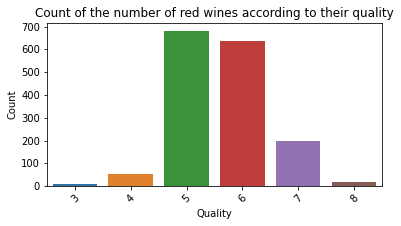

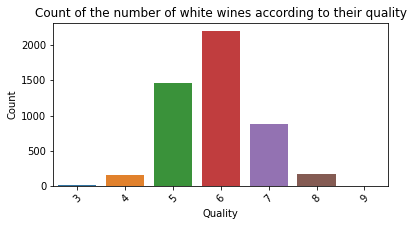

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 3))
sns.countplot(x = "quality", data = red_dataset)
plt.title("Count of the number of red wines according to their quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(rotation=45) # Rotate the x labels so they don't overlap
plt.show()
plt.close()

plt.figure(figsize = (6, 3))
sns.countplot(x = "quality", data = white_dataset)
plt.title("Count of the number of white wines according to their quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(rotation=45) # Rotate the x labels so they don't overlap
plt.show()
plt.close()

From this plot we can see our dataset is quite imbalanced. 
*   Qualities 5 and 6  make up a significant proportion of the Quality examples. As such, we now know we will have to handle this. 
*   Qualities 5, 6 and 7 are the top 3 quality levels in both red and white datasets.

Let's now take a look at numerical features. We can output summary statistics for them using `describe()`.

### Feature Summary

Summary statistics are generated for all chemical properties to identify typical ranges, outliers, and potential relationships with wine quality. This step informs feature selection and guides further analysis.

In [8]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

print("Summary statistics for the red wine dataset:\n")
display(red_dataset[features].describe())

print("Summary statistics for the white wine dataset:\n")
display(white_dataset[features].describe())

Summary statistics for the red wine dataset:



fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Summary statistics for the white wine dataset:



fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [9]:
features2 = ['residual sugar', 'alcohol', 'quality']

print("Summary statistics for the red wine dataset:\n")
display(red_dataset[features2].describe())

print("Summary statistics for the white wine dataset:\n")
display(white_dataset[features2].describe())

Summary statistics for the red wine dataset:



residual sugar      alcohol      quality
count     1599.000000  1599.000000  1599.000000
mean         2.538806    10.422983     5.636023
std          1.409928     1.065668     0.807569
min          0.900000     8.400000     3.000000
25%          1.900000     9.500000     5.000000
50%          2.200000    10.200000     6.000000
75%          2.600000    11.100000     6.000000
max         15.500000    14.900000     8.000000

Summary statistics for the white wine dataset:



residual sugar      alcohol      quality
count     4898.000000  4898.000000  4898.000000
mean         6.391415    10.514267     5.877909
std          5.072058     1.230621     0.885639
min          0.600000     8.000000     3.000000
25%          1.700000     9.500000     5.000000
50%          5.200000    10.400000     6.000000
75%          9.900000    11.400000     6.000000
max         65.800000    14.200000     9.000000

### Alcohol Content Categorization

Alcohol content is discretized into three categories (low, mid, high) based on its distribution in each wine type. This new categorical variable enables further analysis of how alcohol levels relate to wine quality.

Created a 3-valued "alcohol_cat" variable to represent this.

*   low < (average - stddev (https://numpy.org/doc/stable/reference/generated/numpy.std.html)
*   (average - stddev) < mid < (average + stddev)
*   high > (average + stddev).

In [10]:
alcohol_cat_red = []
alcohol_cat_white = []

avg_red = red_dataset.describe()["alcohol"]['mean']
std_red = red_dataset.describe()["alcohol"]['std']

avg_white = white_dataset.describe()["alcohol"]['mean']
std_white = white_dataset.describe()["alcohol"]['std']


In [11]:
for v in red_dataset["alcohol"]:
  if v <= (avg_red - std_red):
    alcohol_cat_red.append("low")
  elif v >= (avg_red + std_red) :
    alcohol_cat_red.append("high")
  else:
    alcohol_cat_red.append("mid")

In [12]:
for v in white_dataset["alcohol"]:
  if v <= (avg_white - std_white):
    alcohol_cat_white.append("low")
  elif v >= (avg_white + std_white) :
    alcohol_cat_white.append("high")
  else:
    alcohol_cat_white.append("mid")

In [13]:
red_dataset["alcohol_cat"] = alcohol_cat_red

print(f"Number of examples: {red_dataset.shape[0]}")
print(f"Number of features: {red_dataset.shape[1]}")
print(f"List of features:\n\t{red_dataset.columns}")

print(f"\nExamining the first 5 entries in the red wine dataset including the alcohol_cat variable:")
display(red_dataset.head())

Number of examples: 1599
Number of features: 13
List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_cat'],
      dtype='object')

Examining the first 5 entries in the red wine dataset including the alcohol_cat variable:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality alcohol_cat  
0      9.4        5         mid  
1      9.8        5         mid  
2      9.8        5         mid  
3      9.8        6         mid  
4      9.4        5         mid

In [14]:
white_dataset["alcohol_cat"] = alcohol_cat_white

print(f"Number of examples: {white_dataset.shape[0]}")
print(f"Number of features: {white_dataset.shape[1]}")
print(f"List of features:\n\t{white_dataset.columns}")

print(f"\nExamining the first 5 entries in the white wine dataset:")
display(white_dataset.head())

Number of examples: 4898
Number of features: 13
List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_cat'],
      dtype='object')

Examining the first 5 entries in the white wine dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality alcohol_cat  
0      8.8        6         low  
1      9.5        6         mid  
2     10.1        6         mid  
3      9.9        6         mid  
4      9.9        6         mid

### Wine Quality by Alcohol Category

Quality distributions are visualized within each alcohol category to assess the relationship between alcohol content and perceived wine quality.

#### Distribution of wine quality
Using alcohol_cat after discretising the alcohol content variables.

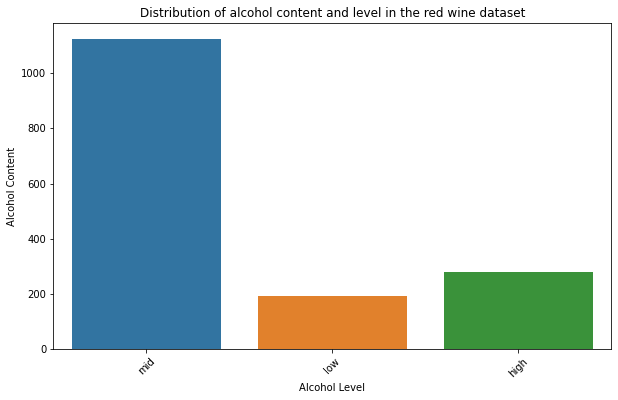

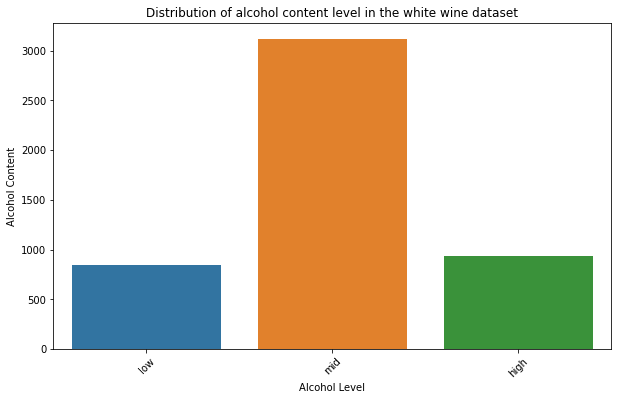

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
sns.countplot(x = "alcohol_cat", data = red_dataset)
plt.title("Distribution of alcohol content and level in the red wine dataset")
plt.xlabel("Alcohol Level")
plt.ylabel("Alcohol Content")
plt.xticks(rotation=45) # Rotate the x labels so they don't overlap
plt.show()
plt.close()

plt.figure(figsize = (10, 6))
sns.countplot(x = "alcohol_cat", data = white_dataset)
plt.title("Distribution of alcohol content level in the white wine dataset")
plt.xlabel("Alcohol Level")
plt.ylabel("Alcohol Content")
plt.xticks(rotation=45) # Rotate the x labels so they don't overlap
plt.show()
plt.close()

From the above plots we can derive:

*   The "mid" content level makes up a significat proportion of the alcohol content for both datasets. 
*   Distribution quite imbalaced for both.

#### Bar count plot for relationship between alcohol_cat and quality.

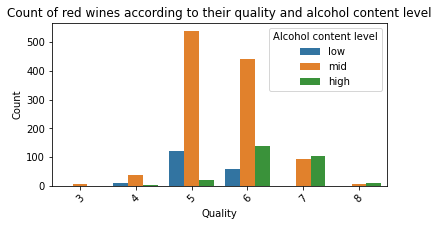

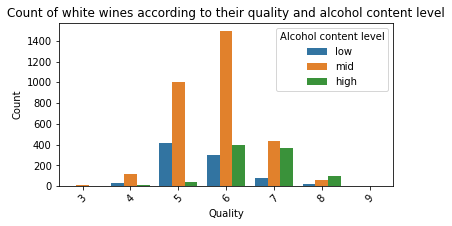

In [16]:
data = red_dataset
plt.figure(figsize = (6, 3))
sns.countplot(x ='quality', hue = "alcohol_cat", data = data, hue_order = ['low', 'mid', 'high'])
plt.title("Count of red wines according to their quality and alcohol content level")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.legend(title = "Alcohol content level")
plt.xticks(rotation=45) # Rotate the x labels so they don't overlap
plt.show()
plt.close()

data = white_dataset
plt.figure(figsize = (6, 3))
sns.countplot(x ='quality', hue = "alcohol_cat", data = data, hue_order = ['low', 'mid', 'high'])
plt.title("Count of white wines according to their quality and alcohol content level")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.legend(title = "Alcohol content level")
plt.xticks(rotation=45) # Rotate the x labels so they don't overlap
plt.show()
plt.close()

Conclusions relationship between alcohol content and quality in both datasets:

*   Lowest and highest quality wines -> lower or high alcohol content
*   "mid" alcohol content make up the count for qualities 5 and 6
*   Most of both wines are quality 5 or 6 with an alcohol level of "mid".

### Sweetness Classification

Residual sugar is analyzed to define a threshold separating "sweet" from "dry" wines, resulting in a balanced binary variable. The impact of sweetness on wine quality is then explored.

The distributions of residual sugar are skewed for both reds and whites (in fact most wines in this dataset are dry according to the official definition, e.g., https://winefolly.com/deep-dive/sugar-in-wine-chart/) (https://winefolly.com/deep-dive/sugar-in-wine-chart/).

**Plot 'residual sugar' for red wine dataset:**

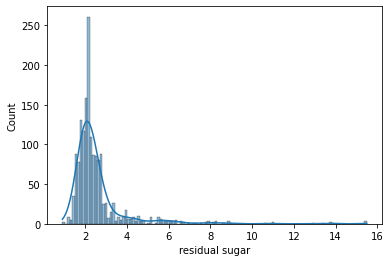

In [17]:
sns.histplot(data=red_dataset['residual sugar'], kde=True)

**Plot 'residual sugar' for white wine dataset:**

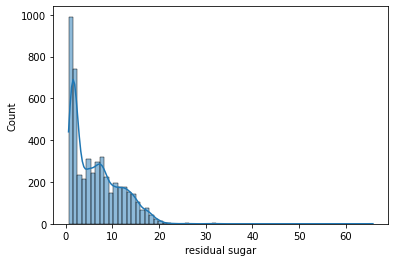

In [18]:
sns.histplot(data=white_dataset['residual sugar'], kde=True)

*  Separated "sweet" and "dry" wines by splitting the datasets (almost) evenly 
using the 'mid' value ('50%' in the summary statiscs table).

* Created 'isSweeet' variable to represent these two classes.

* Dry wine: isSweet="dry"

* Sweet wine: isSweet="sweet"


In [19]:
isSweet_red = []
isSweet_white = []

mid_red = red_dataset.describe()["residual sugar"]['50%']

mid_white = white_dataset.describe()["residual sugar"]['50%']

In [20]:
for i in red_dataset["residual sugar"]:
  if i < (mid_red):
    isSweet_red.append("dry")
  else:
    isSweet_red.append("sweet")

for i in white_dataset["residual sugar"]:
  if i < (mid_white):
    isSweet_white.append("dry")
  else:
    isSweet_white.append("sweet")

In [21]:
red_dataset["isSweet"] = isSweet_red

print(f"Number of examples: {red_dataset.shape[0]}")
print(f"Number of features: {red_dataset.shape[1]}")
print(f"List of features:\n\t{red_dataset.columns}")

print(f"\nExamining the first 5 entries in the red wine dataset including the alcohol_cat variable:")
display(red_dataset.head())

Number of examples: 1599
Number of features: 14
List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_cat', 'isSweet'],
      dtype='object')

Examining the first 5 entries in the red wine dataset including the alcohol_cat variable:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality alcohol_cat isSweet  
0      9.4        5         mid     dry  
1      9.8        5         mid   sweet  
2      9.8        5         mid   sweet  
3      9.8        6         mid     dry  
4      9.4        5         mid     dry

In [22]:
white_dataset["isSweet"] = isSweet_white

print(f"Number of examples: {white_dataset.shape[0]}")
print(f"Number of features: {white_dataset.shape[1]}")
print(f"List of features:\n\t{white_dataset.columns}")

print(f"\nExamining the first 5 entries in the white wine dataset:")
display(white_dataset.head())

Number of examples: 4898
Number of features: 14
List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_cat', 'isSweet'],
      dtype='object')

Examining the first 5 entries in the white wine dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality alcohol_cat isSweet  
0      8.8        6         low   sweet  
1      9.5        6         mid     dry  
2     10.1        6         mid   sweet  
3      9.9        6         mid   sweet  
4      9.9        6         mid   sweet

#### Integer Encoding for "isSweet":

The method called Integer Encoding, consists of mapping each categorical label into an integer1, which in practice will mean mapping the labels “dry” and “sweet” to the integers 0 and 1 respectively. 

This is a good encoding variable practice in the event of needing to compare the performance of future models using a reduced number of labels instead of the original continuous values.

* Dry wine: isSweet=0

* Sweet wine: isSweet=1

In [23]:
class_numeric1 = {'dry': 0, 'sweet': 1}

numeric_class_dataset = red_dataset.replace({'isSweet': class_numeric1})

red_dataset_num = red_dataset.drop('isSweet', axis = 1)
red_dataset_num = pd.concat((red_dataset_num, numeric_class_dataset['isSweet']), axis = 1)

print(f"Number of examples: {red_dataset_num.shape[0]}")
print(f"Number of features: {red_dataset_num.shape[1]}")
print(f"List of features:\n\t{red_dataset_num.columns}")

print(f"\nExamining the first 5 entries in the red wine dataset:")
display(red_dataset_num)

Number of examples: 1599
Number of features: 14
List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_cat', 'isSweet'],
      dtype='object')

Examining the first 5 entries in the red wine dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality alcohol_cat  isSweet  
0         9.4        5         mid        0  
1         9.8        5         mid        1  
2         9.8        5         mid        1  
3         9.8        6         mid        0  
4         9.4        5         mid        0  
...       ...      ...         ...      ...  
1594     10.5        5         mid        0  
1595     11.2        6         mid        1  
1596     11.0        6         mid        1  
1597     10.2        5         mid        0  
1598     11.0        6         mid        1  

[1599 rows x 14 columns]

In [24]:
class_numeric1 = {'dry': 0, 'sweet': 1}

numeric_class_dataset = white_dataset.replace({'isSweet': class_numeric1})

white_dataset_num = white_dataset.drop('isSweet', axis = 1)
white_dataset_num = pd.concat((white_dataset_num, numeric_class_dataset['isSweet']), axis = 1)

print(f"Number of examples: {white_dataset_num.shape[0]}")
print(f"Number of features: {white_dataset_num.shape[1]}")
print(f"List of features:\n\t{white_dataset_num.columns}")

print(f"\nExamining the first 5 entries in the red wine dataset:")
display(white_dataset_num)

Number of examples: 4898
Number of features: 14
List of features:
	Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_cat', 'isSweet'],
      dtype='object')

Examining the first 5 entries in the red wine dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality alcohol_cat  isSweet  
0         8.8        6         low        1  
1         9.5        6         mid        0  
2        10.1        6         mid        1  
3         9.9        6         mid        1  
4         9.9        6         mid        1  
...       ...      ...         ...      ...  
4893     11.2        6         mid        0  
4894      9.6        5         mid        1  
4895      9.4        6         mid        0  
4896     12.8        7        high        0  
4897     11.8        6        high        0  

[4898 rows x 14 columns]

### Wine Quality by Sweetness

Quality distributions are compared between sweet and dry wines to determine if sweetness is associated with higher or lower perceived quality, for both red and white wines.

#### **Distribution analysis 'quality' vs 'isSweet':**

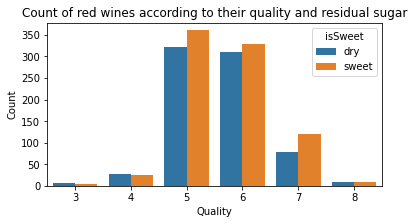

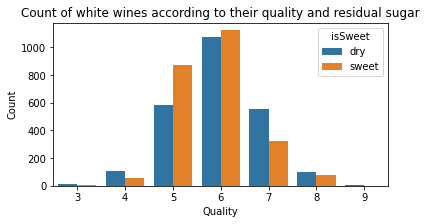

In [25]:
plt.figure(figsize = (6, 3))
sns.countplot(x ='quality', hue = "isSweet", data = red_dataset, hue_order = ['dry', 'sweet'])
plt.title("Count of red wines according to their quality and residual sugar")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.legend(title = "isSweet")
plt.show()
plt.close()

plt.figure(figsize = (6, 3))
sns.countplot(x ='quality', hue = "isSweet", data = white_dataset, hue_order = ['dry', 'sweet'])
plt.title("Count of white wines according to their quality and residual sugar")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.legend(title = "isSweet")
plt.show()
plt.close()

Are sweet wines perceived as lower or higher quality than dry wines

*   For the red wine dataset, we can see that wines are more sweet when their qualities are 5 and 6.
*   For the white wine dataset, we can see that wines are more sweet when their qualities are 5 and 6.



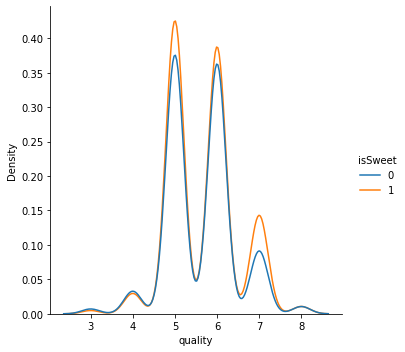

In [26]:
sns.displot(red_dataset_num, x="quality", hue="isSweet", kind="kde")

**Red wine dataset:**

We can conclude that for the red wine dataset, the sweeter wines have a higher quality as seen from the histogram that when the variable isSweet=1 we can see how the bars for the sweet wines are higher for qualities 5, 6 and 7. Therefore we can say that sweet wines (residual_sugar > mid) have a bit higher quality than dry wines (isSweet=0).

*MORE PLOTS ON EXTENSION 1 !!*

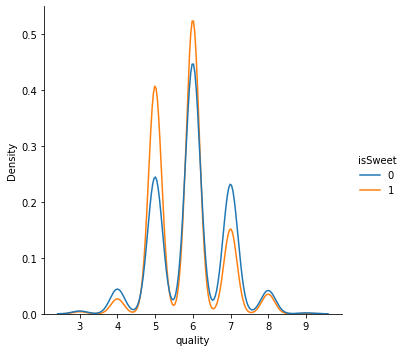

In [27]:
sns.displot(white_dataset_num, x="quality", hue="isSweet", kind="kde")

**White wine dataset:**

We can see from the graphs above, how for qualities 5 and 6 the wines tend to be sweeter rather than for the rest of the qualities, the dry wines are more predominant.
- Qualities 4, 7 and 8, the wines are more dry (isSweet = 0).
- Qualities 5 and 6, the wines are sweeter (isSweet = 1).

# **TASK 2**

## **Identifying Useful Variable Subsets for Machine Learning**

To prepare for building predictive models, it is important to analyze the relationships between variables in the wine datasets. This involves:

- Examining correlations between each pair of variables.
- Assessing the correlation between each variable and the outcome variable ("quality").
- Visualizing the correlation matrices using seaborn or matplotlib.
- Interpreting how variables may relate to each other, using appropriate correlation metrics such as 'pearson', 'kendall', or 'spearman'.

## Red wine dataset:

In [28]:
red_dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality alcohol_cat isSweet  
0         9.4        5         mid     dry  
1         9.8        5         mid   sweet  
2         9.8        5         mid   sweet  
3         9.8        6         mid     dry  
4         9.4        5         mid     dry  
...       ...      ...         ...     ...  
1594     10.5        5         mid     dry  
1595     11.2        6         mid   sweet  
1596     11.0        6         mid   sweet  
1597     10.2        5         mid     dry  
1598     11.0        6         mid   sweet  

[1599 rows x 14 columns]

### Visual Exploration

Histograms and pairplots reveal that not all variables are normally distributed, and some show clear outliers and ordinal characteristics. This justifies the use of non-parametric correlation methods.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cd62ecd10>,
      dtype=object)

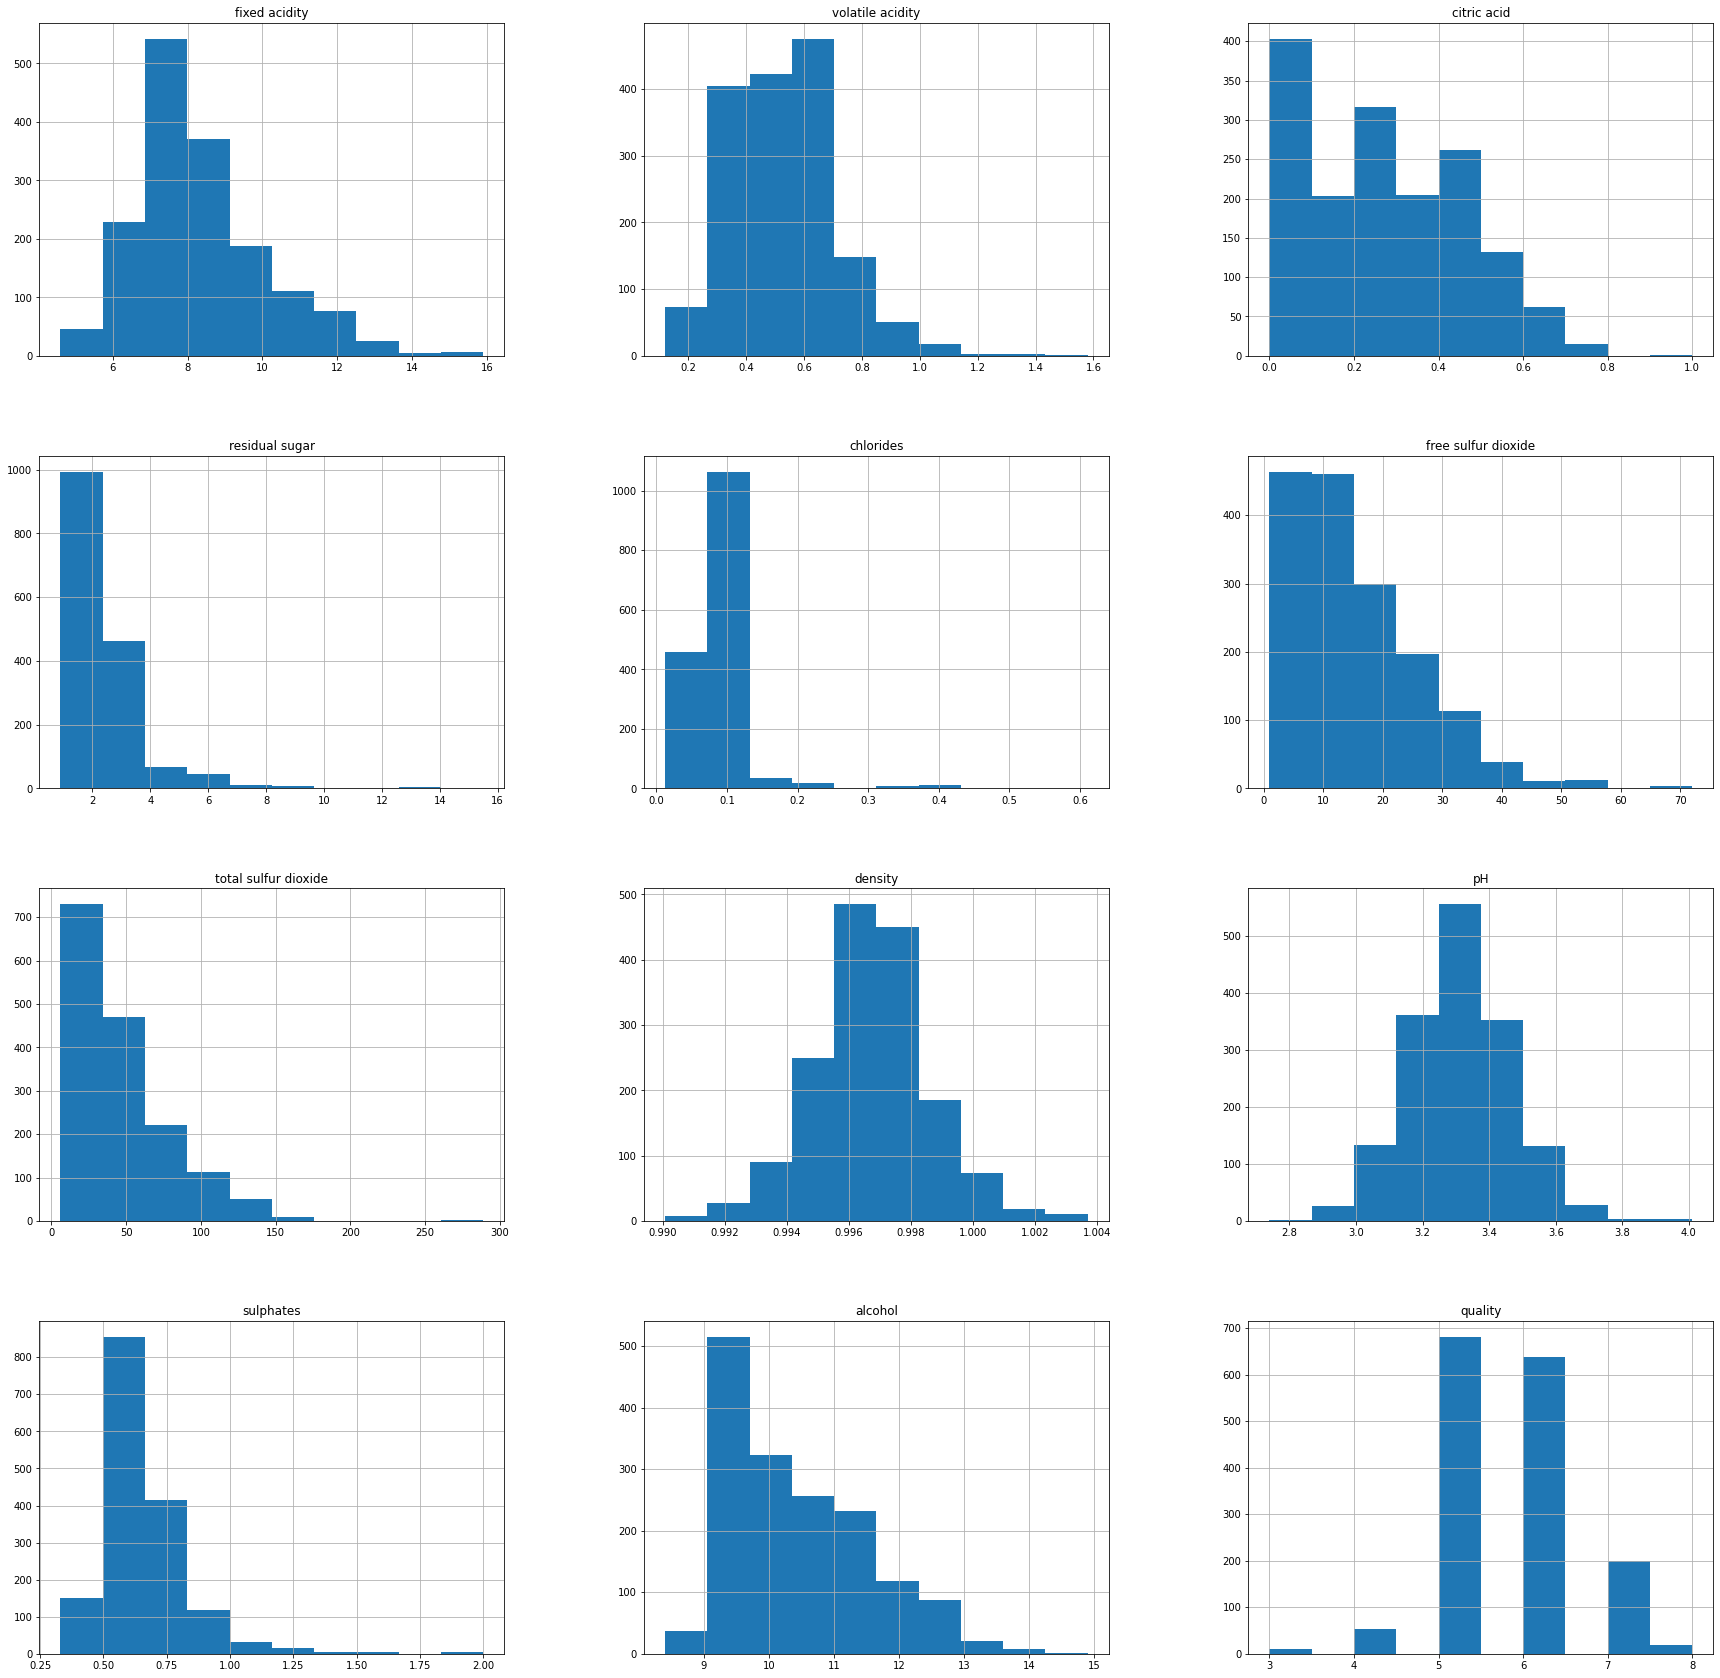

In [29]:
red_dataset.hist(figsize=(30,30))

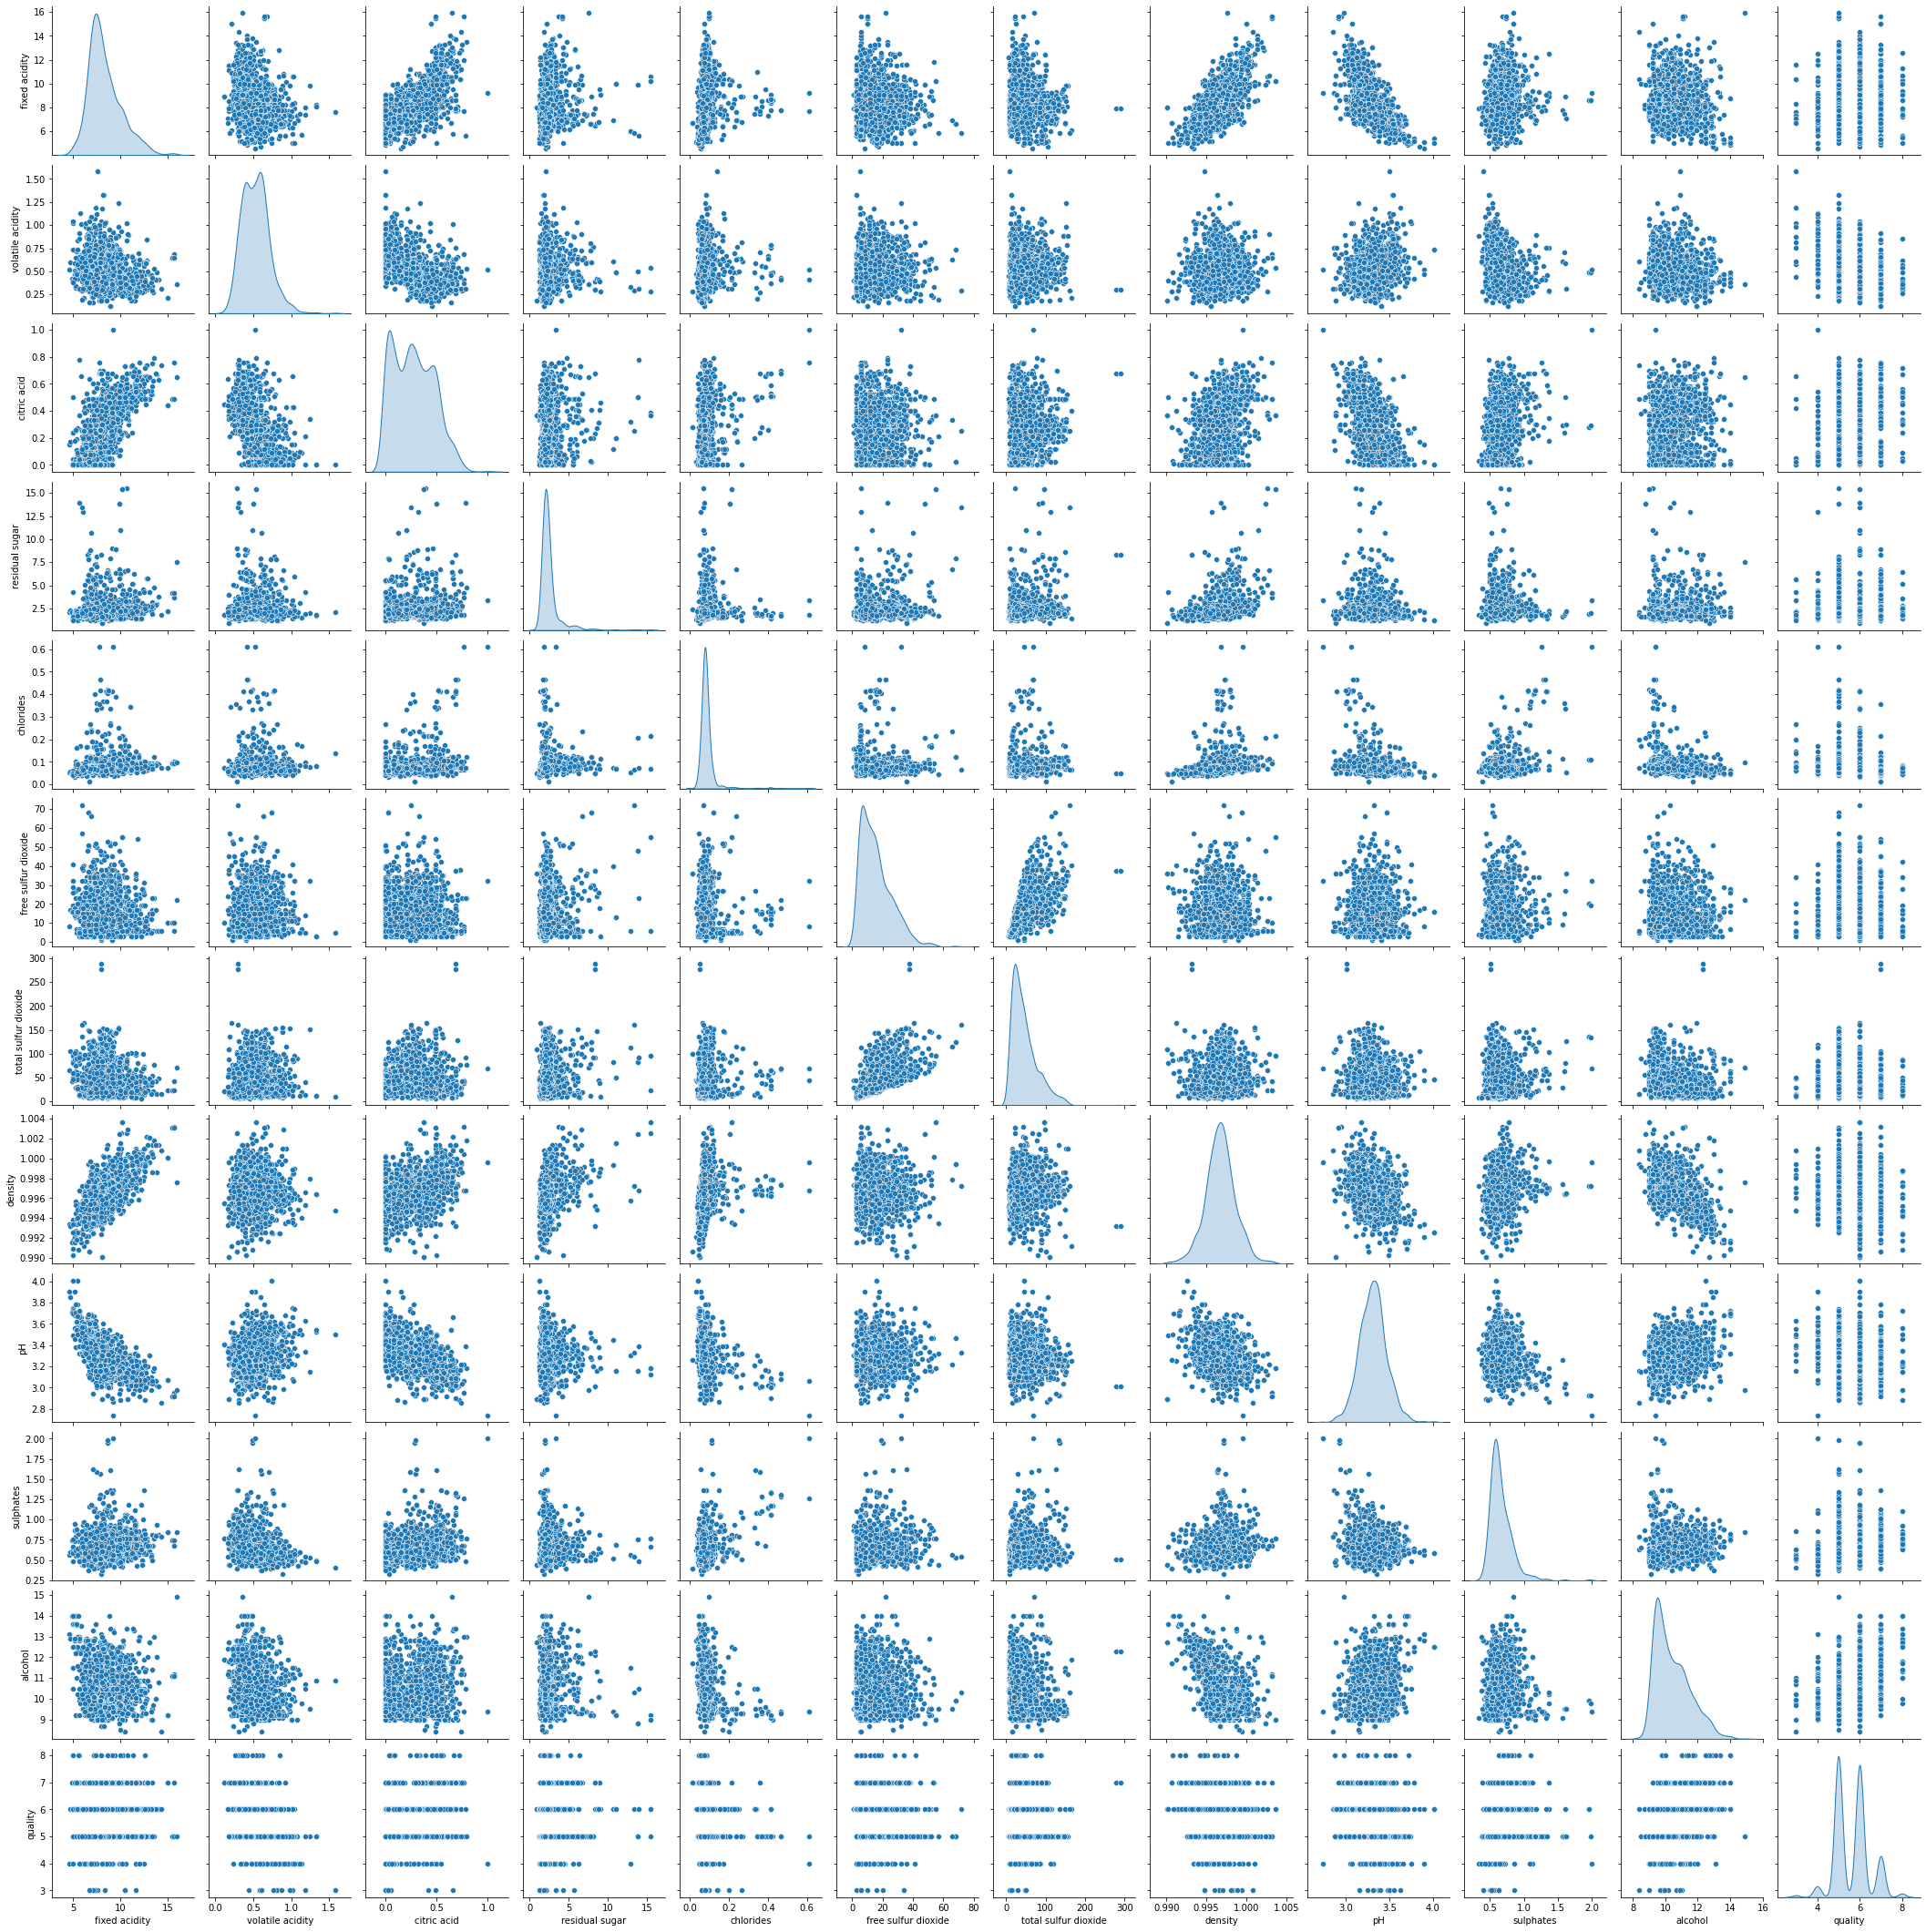

In [30]:
sns.pairplot(red_dataset, diag_kind="kde", kind="scatter", palette="husl")

**Why "spearman" and "kendall" as the chosen methods?**


*   Not all variables (columns) have normal distributions (linear), as seen on the histograms above.
*   Not all continuous data.
*   There also exist 'atypical' values (dots outside the congregation area) shown when plotting various variables above.
*   Can be seen some ordinal data.

**Spearman and Kendall Coefficients:**

Both are incredibly similar since they are non-parametric tests that measure a monotonic relationship using ranked data. 

Kendall’s and Spearman’s both measure the monotonic relationship. While linear relationships mean two variables move together at a constant rate (straight line), monotonic relationships measure how likely it is for two variables to move in the same direction, but not necessarily at a constant rate.

Works with *linear* and *monotonic* relationships between the two variables.

**Monotonic realtionships** are where, the value of both variables increases or
as the value of one variable increases, the other variable value decreases but not exactly at a constant rate as would be for **linear relationsips**.

*References:*

*https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8*

*https://www.tessellationtech.io/data-science-stats-review/*

-------

We would consider discarting pairs of variables whose correlation coefficient is closer to 0, since they do not offer any insight related to their relationship.




### Correlation Matrix for red wine dataset using "kendall":

In [31]:
red_dataset_corr = red_dataset.corr(method="kendall")
red_dataset_corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.185197     0.484271   
volatile acidity          -0.185197          1.000000    -0.428354   
citric acid                0.484271         -0.428354     1.000000   
residual sugar             0.155029          0.022407     0.123007   
chlorides                  0.176043          0.109608     0.076729   
free sulfur dioxide       -0.119301          0.012573    -0.049804   
total sulfur dioxide      -0.056879          0.063701     0.011645   
density                    0.457461          0.015913     0.245729   
pH                        -0.527832          0.158746    -0.389752   
sulphates                  0.141343         -0.228888     0.226669   
alcohol                   -0.048870         -0.151839     0.064004   
quality                    0.087966         -0.300779     0.167318   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.155029   0.176043            -0.119301   
volatile acidity            0.022407   0.109608             0.012573   
citric acid                 0.123007   0.076729            -0.049804   
residual sugar              1.000000   0.152415             0.052682   
chlorides                   0.152415   1.000000             0.000439   
free sulfur dioxide         0.052682   0.000439             1.000000   
total sulfur dioxide        0.102265   0.091610             0.606908   
density                     0.295986   0.287866            -0.028972   
pH                         -0.063127  -0.162706             0.079300   
sulphates                   0.026959   0.014227             0.031706   
alcohol                     0.081206  -0.197176            -0.056019   
quality                     0.025744  -0.148919            -0.045646   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.056879  0.457461 -0.527832   0.141343   
volatile acidity                  0.063701  0.015913  0.158746  -0.228888   
citric acid                       0.011645  0.245729 -0.389752   0.226669   
residual sugar                    0.102265  0.295986 -0.063127   0.026959   
chlorides                         0.091610  0.287866 -0.162706   0.014227   
free sulfur dioxide               0.606908 -0.028972  0.079300   0.031706   
total sulfur dioxide              1.000000  0.087719 -0.006798  -0.000194   
density                           0.087719  1.000000 -0.217228   0.110191   
pH                               -0.006798 -0.217228  1.000000  -0.053568   
sulphates                        -0.000194  0.110191 -0.053568   1.000000   
alcohol                          -0.179212 -0.329754  0.125311   0.143745   
quality                          -0.156612 -0.136611 -0.034235   0.299270   

                       alcohol   quality  
fixed acidity        -0.048870  0.087966  
volatile acidity     -0.151839 -0.300779  
citric acid           0.064004  0.167318  
residual sugar        0.081206  0.025744  
chlorides            -0.197176 -0.148919  
free sulfur dioxide  -0.056019 -0.045646  
total sulfur dioxide -0.179212 -0.156612  
density              -0.329754 -0.136611  
pH                    0.125311 -0.034235  
sulphates             0.143745  0.299270  
alcohol               1.000000  0.380367  
quality               0.380367  1.000000

**Why "kendall" when comparing against the outcome "quality"?**

Chose the method "kendall" when comparing variables against "quality", since the "kendall" coefficient is also a test of strength of dependence (how well a variable could be written as a linear function of the other).

**Interpretation:**

*   Strong correlation: > 0.7 
*   Moderate correlation: 0.5 - 0.7
*   Weak correlation: < 0.4

**Conclusions:**

*   Correlation between *'residual sugar'* and *'quality'* is equal to 0.026 and since this value is closer to 0, their correlation is **weak**.
*   Correlation between *'alcohol'* and *'quality'* is equal to 0.476 and since this is closer to 0.5, their correlation is considered to be **moderate**.



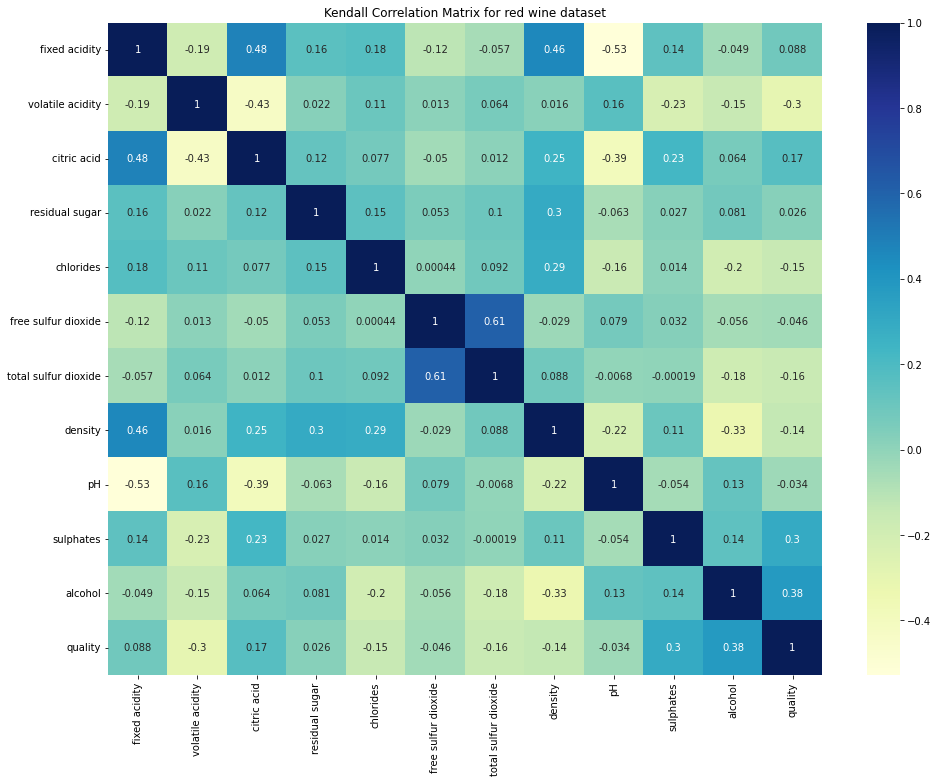

In [32]:
plt.figure(figsize=(16, 12))
plt.title("Kendall Correlation Matrix for red wine dataset")
sns.heatmap(red_dataset_corr, annot=True, cmap="YlGnBu")

**Interpretation:**

Ccoefficients range from -1 to +1. 

The sign of the coefficient indicates whether it is a positive or negative monotonic relationship.

*   **Negative**: as one variable increases, the other tends to decrease ( variables are inversely related).
*   **Positive**: as one variable increases, the other variable also tends to increase.
*   **0**: no relationship.

Values close to -1 or +1 represent ***stronger relationships*** than values closer to zero.

*References:*

*https://statisticsbyjim.com/basics/spearmans-correlation/*

*https://www.tessellationtech.io/data-science-stats-review/*

The line of 1.00s going from the top left to the bottom right is the **main diagonal**, which shows that each variable always perfectly correlates with itself. This matrix is **symmetrical**, with the same correlation is shown above the main diagonal being a mirror image of those below the main diagonal.


*   "sweet" and "dry" have a very high correlation, therefore can drop one of them since there is no point in having both (no duplicate values in the contibution matrix).

*   We would consider discarting pairs of variables whose correlation coefficient is closer to 0, since they do not offer any insight related to their relationship.



### Correlation Matrix for red wine dataset using "spearman":

In [33]:
red_dataset_columns = red_dataset.drop(['quality'], axis=1)
red_dataset_corr2 = red_dataset_columns.corr(method="spearman")
red_dataset_corr2

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.278282     0.661708   
volatile acidity          -0.278282          1.000000    -0.610259   
citric acid                0.661708         -0.610259     1.000000   
residual sugar             0.220701          0.032386     0.176417   
chlorides                  0.250904          0.158770     0.112577   
free sulfur dioxide       -0.175137          0.021163    -0.076452   
total sulfur dioxide      -0.088417          0.094110     0.009400   
density                    0.623071          0.025014     0.352285   
pH                        -0.706674          0.233572    -0.548026   
sulphates                  0.212654         -0.325584     0.331074   
alcohol                   -0.066576         -0.224932     0.096456   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.220701   0.250904            -0.175137   
volatile acidity            0.032386   0.158770             0.021163   
citric acid                 0.176417   0.112577            -0.076452   
residual sugar              1.000000   0.212959             0.074618   
chlorides                   0.212959   1.000000             0.000805   
free sulfur dioxide         0.074618   0.000805             1.000000   
total sulfur dioxide        0.145375   0.130033             0.789698   
density                     0.422266   0.411390            -0.041178   
pH                         -0.089971  -0.234361             0.115679   
sulphates                   0.038332   0.020825             0.045862   
alcohol                     0.116548  -0.284504            -0.081367   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.088417  0.623071 -0.706674   0.212654   
volatile acidity                  0.094110  0.025014  0.233572  -0.325584   
citric acid                       0.009400  0.352285 -0.548026   0.331074   
residual sugar                    0.145375  0.422266 -0.089971   0.038332   
chlorides                         0.130033  0.411390 -0.234361   0.020825   
free sulfur dioxide               0.789698 -0.041178  0.115679   0.045862   
total sulfur dioxide              1.000000  0.129332 -0.009841  -0.000504   
density                           0.129332  1.000000 -0.312055   0.161478   
pH                               -0.009841 -0.312055  1.000000  -0.080306   
sulphates                        -0.000504  0.161478 -0.080306   1.000000   
alcohol                          -0.257806 -0.462445  0.179932   0.207330   

                       alcohol  
fixed acidity        -0.066576  
volatile acidity     -0.224932  
citric acid           0.096456  
residual sugar        0.116548  
chlorides            -0.284504  
free sulfur dioxide  -0.081367  
total sulfur dioxide -0.257806  
density              -0.462445  
pH                    0.179932  
sulphates             0.207330  
alcohol               1.000000

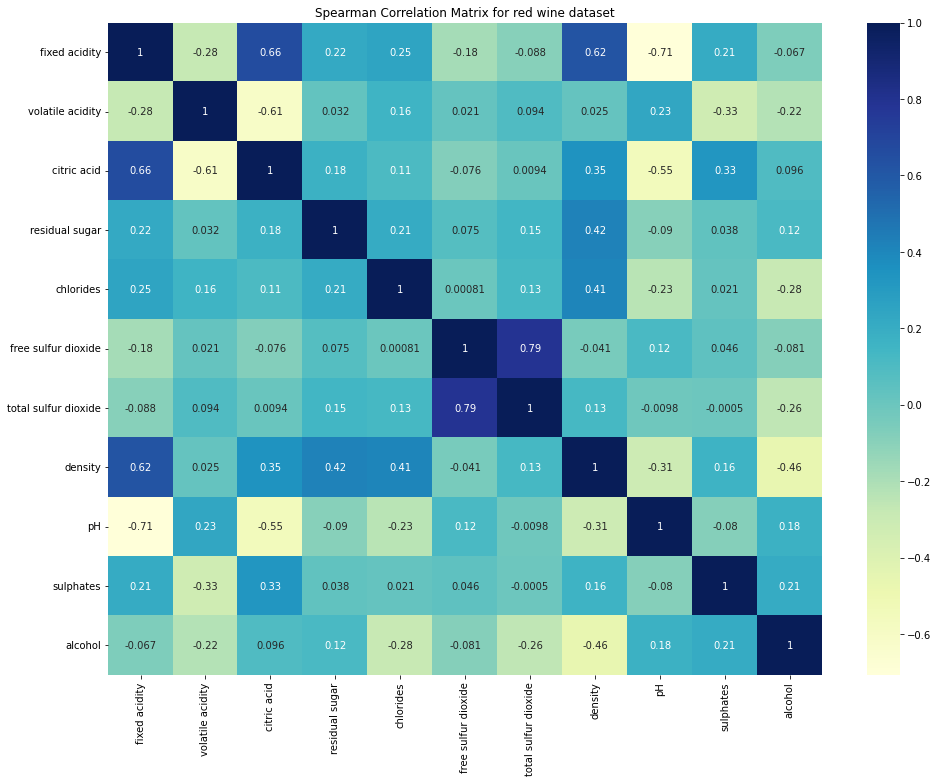

In [34]:
plt.figure(figsize=(16, 12))
plt.title("Spearman Correlation Matrix for red wine dataset")
sns.heatmap(red_dataset_corr2, annot=True, cmap="YlGnBu")

**Interpretation:**

Ccoefficients range from -1 to +1. 

The sign of the coefficient indicates whether it is a positive or negative monotonic relationship.

*   **Negative**: as one variable increases, the other tends to decrease ( variables are inversely related).
*   **Positive**: as one variable increases, the other variable also tends to increase.
*   **0**: no relationship.

Values close to -1 or +1 represent ***stronger relationships*** than values closer to zero.

*References:*

*https://statisticsbyjim.com/basics/spearmans-correlation/*

*https://www.tessellationtech.io/data-science-stats-review/*

**Conclusions:**

If we were to compare amongst the other wine characterics disregarding the outcome quality, we would identify that free sulphur dioxide and total sulphur dioxide (0.79) to be the highest correlated variables according to the “spearman” correlation matrix.

## White wine dataset:

In [35]:
white_dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality alcohol_cat isSweet  
0         8.8        6         low   sweet  
1         9.5        6         mid     dry  
2        10.1        6         mid   sweet  
3         9.9        6         mid   sweet  
4         9.9        6         mid   sweet  
...       ...      ...         ...     ...  
4893     11.2        6         mid     dry  
4894      9.6        5         mid   sweet  
4895      9.4        6         mid     dry  
4896     12.8        7        high     dry  
4897     11.8        6        high     dry  

[4898 rows x 14 columns]

### Visual Exploration

Histograms and pairplots for the white wine dataset also show non-normal distributions and some ordinal features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ccbe0f490>,
      dtype=object)

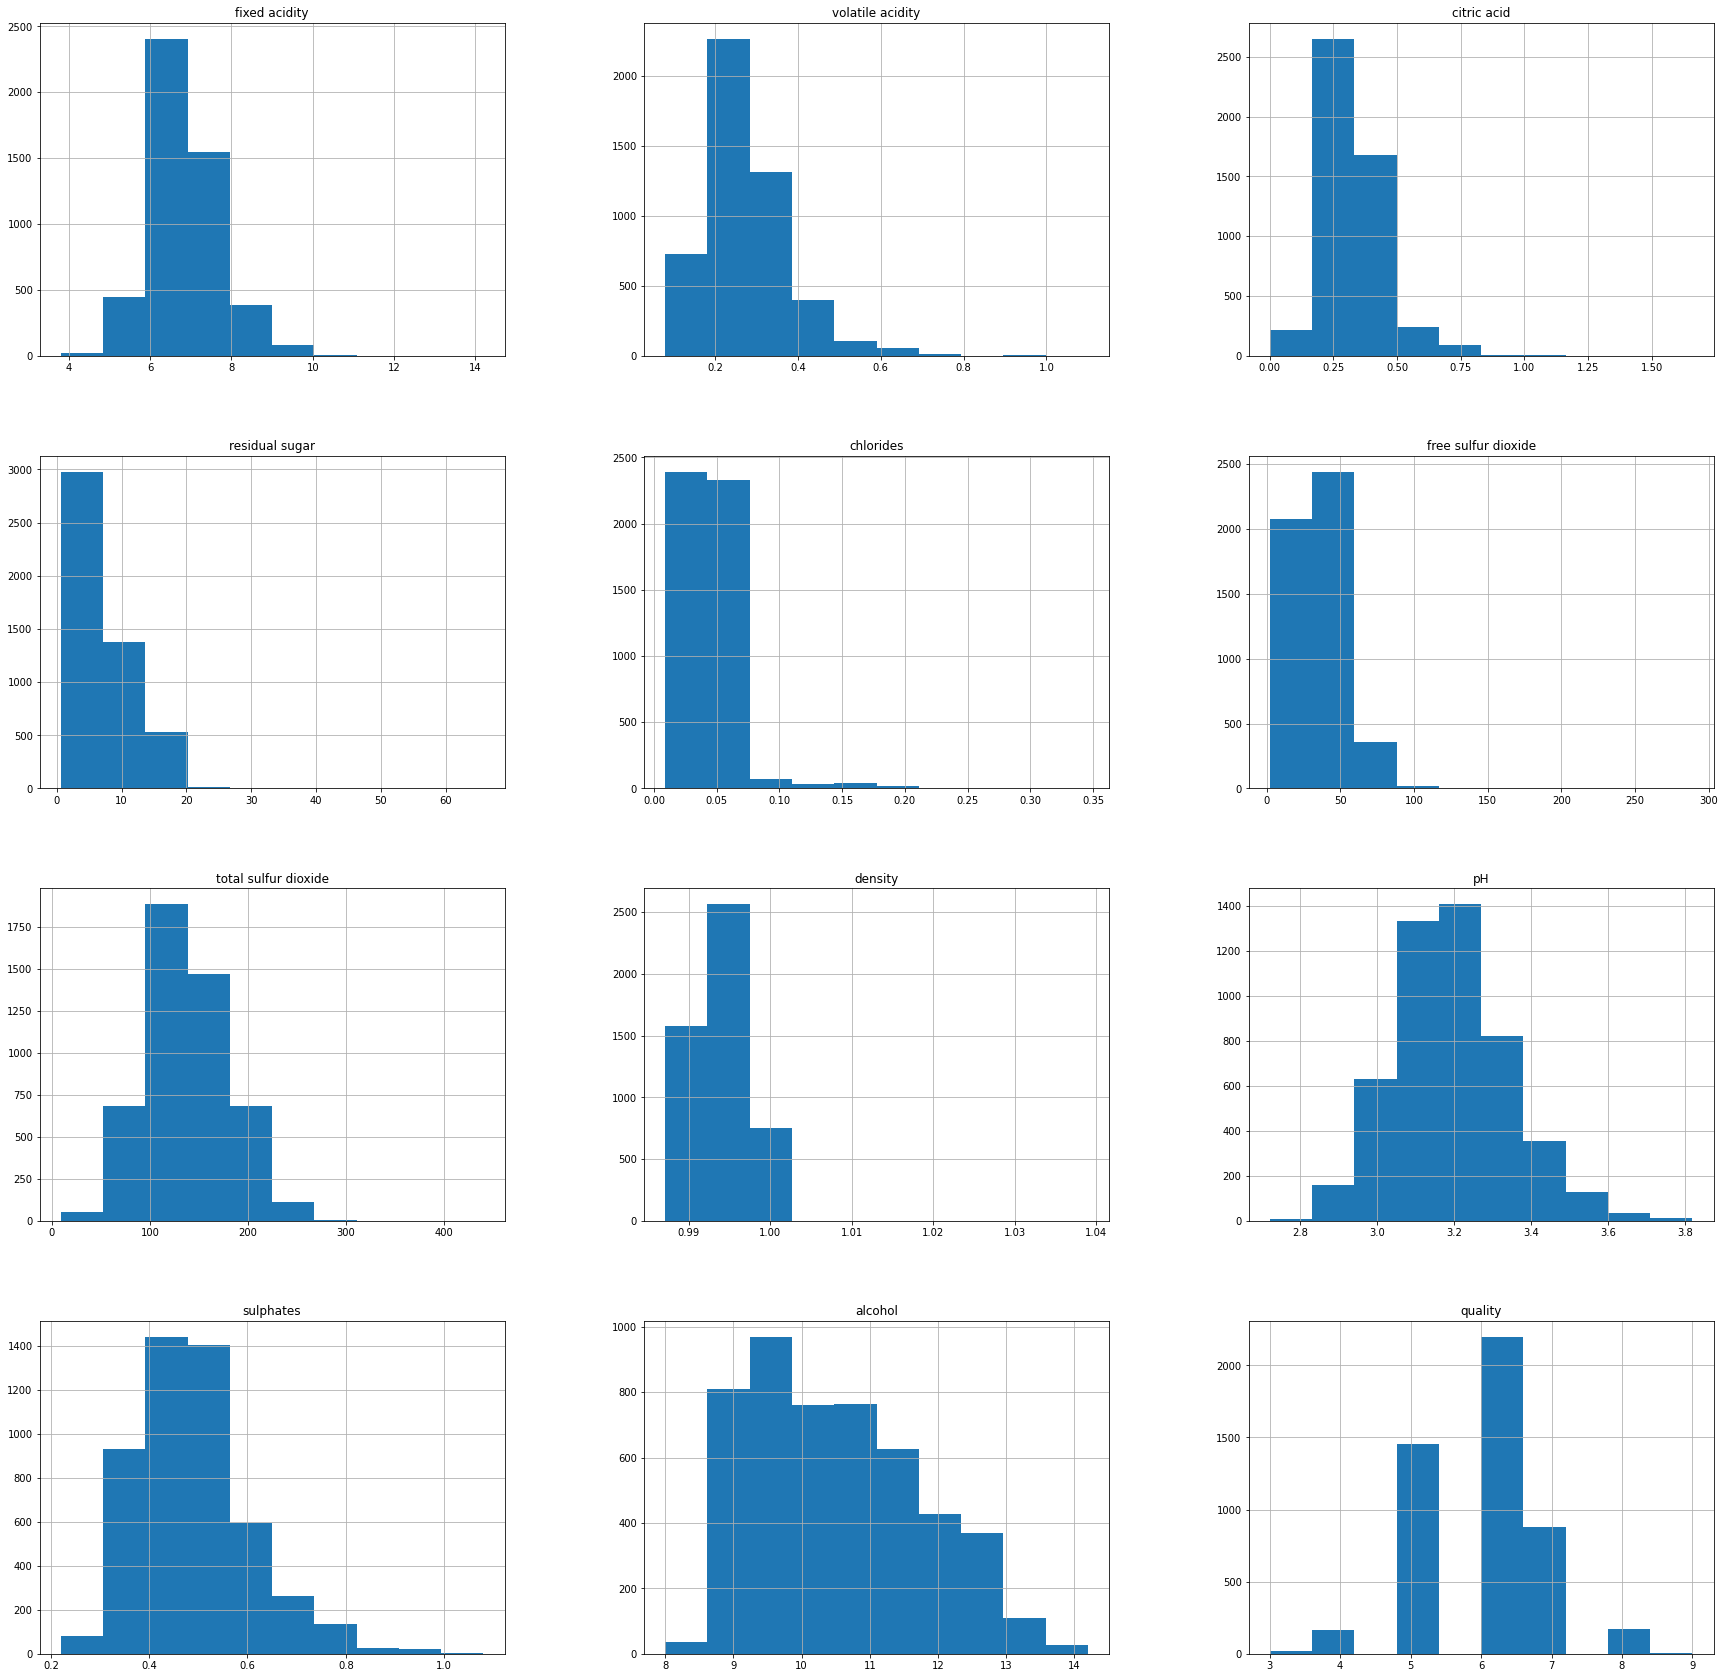

In [36]:
white_dataset.hist(figsize=(30,30))

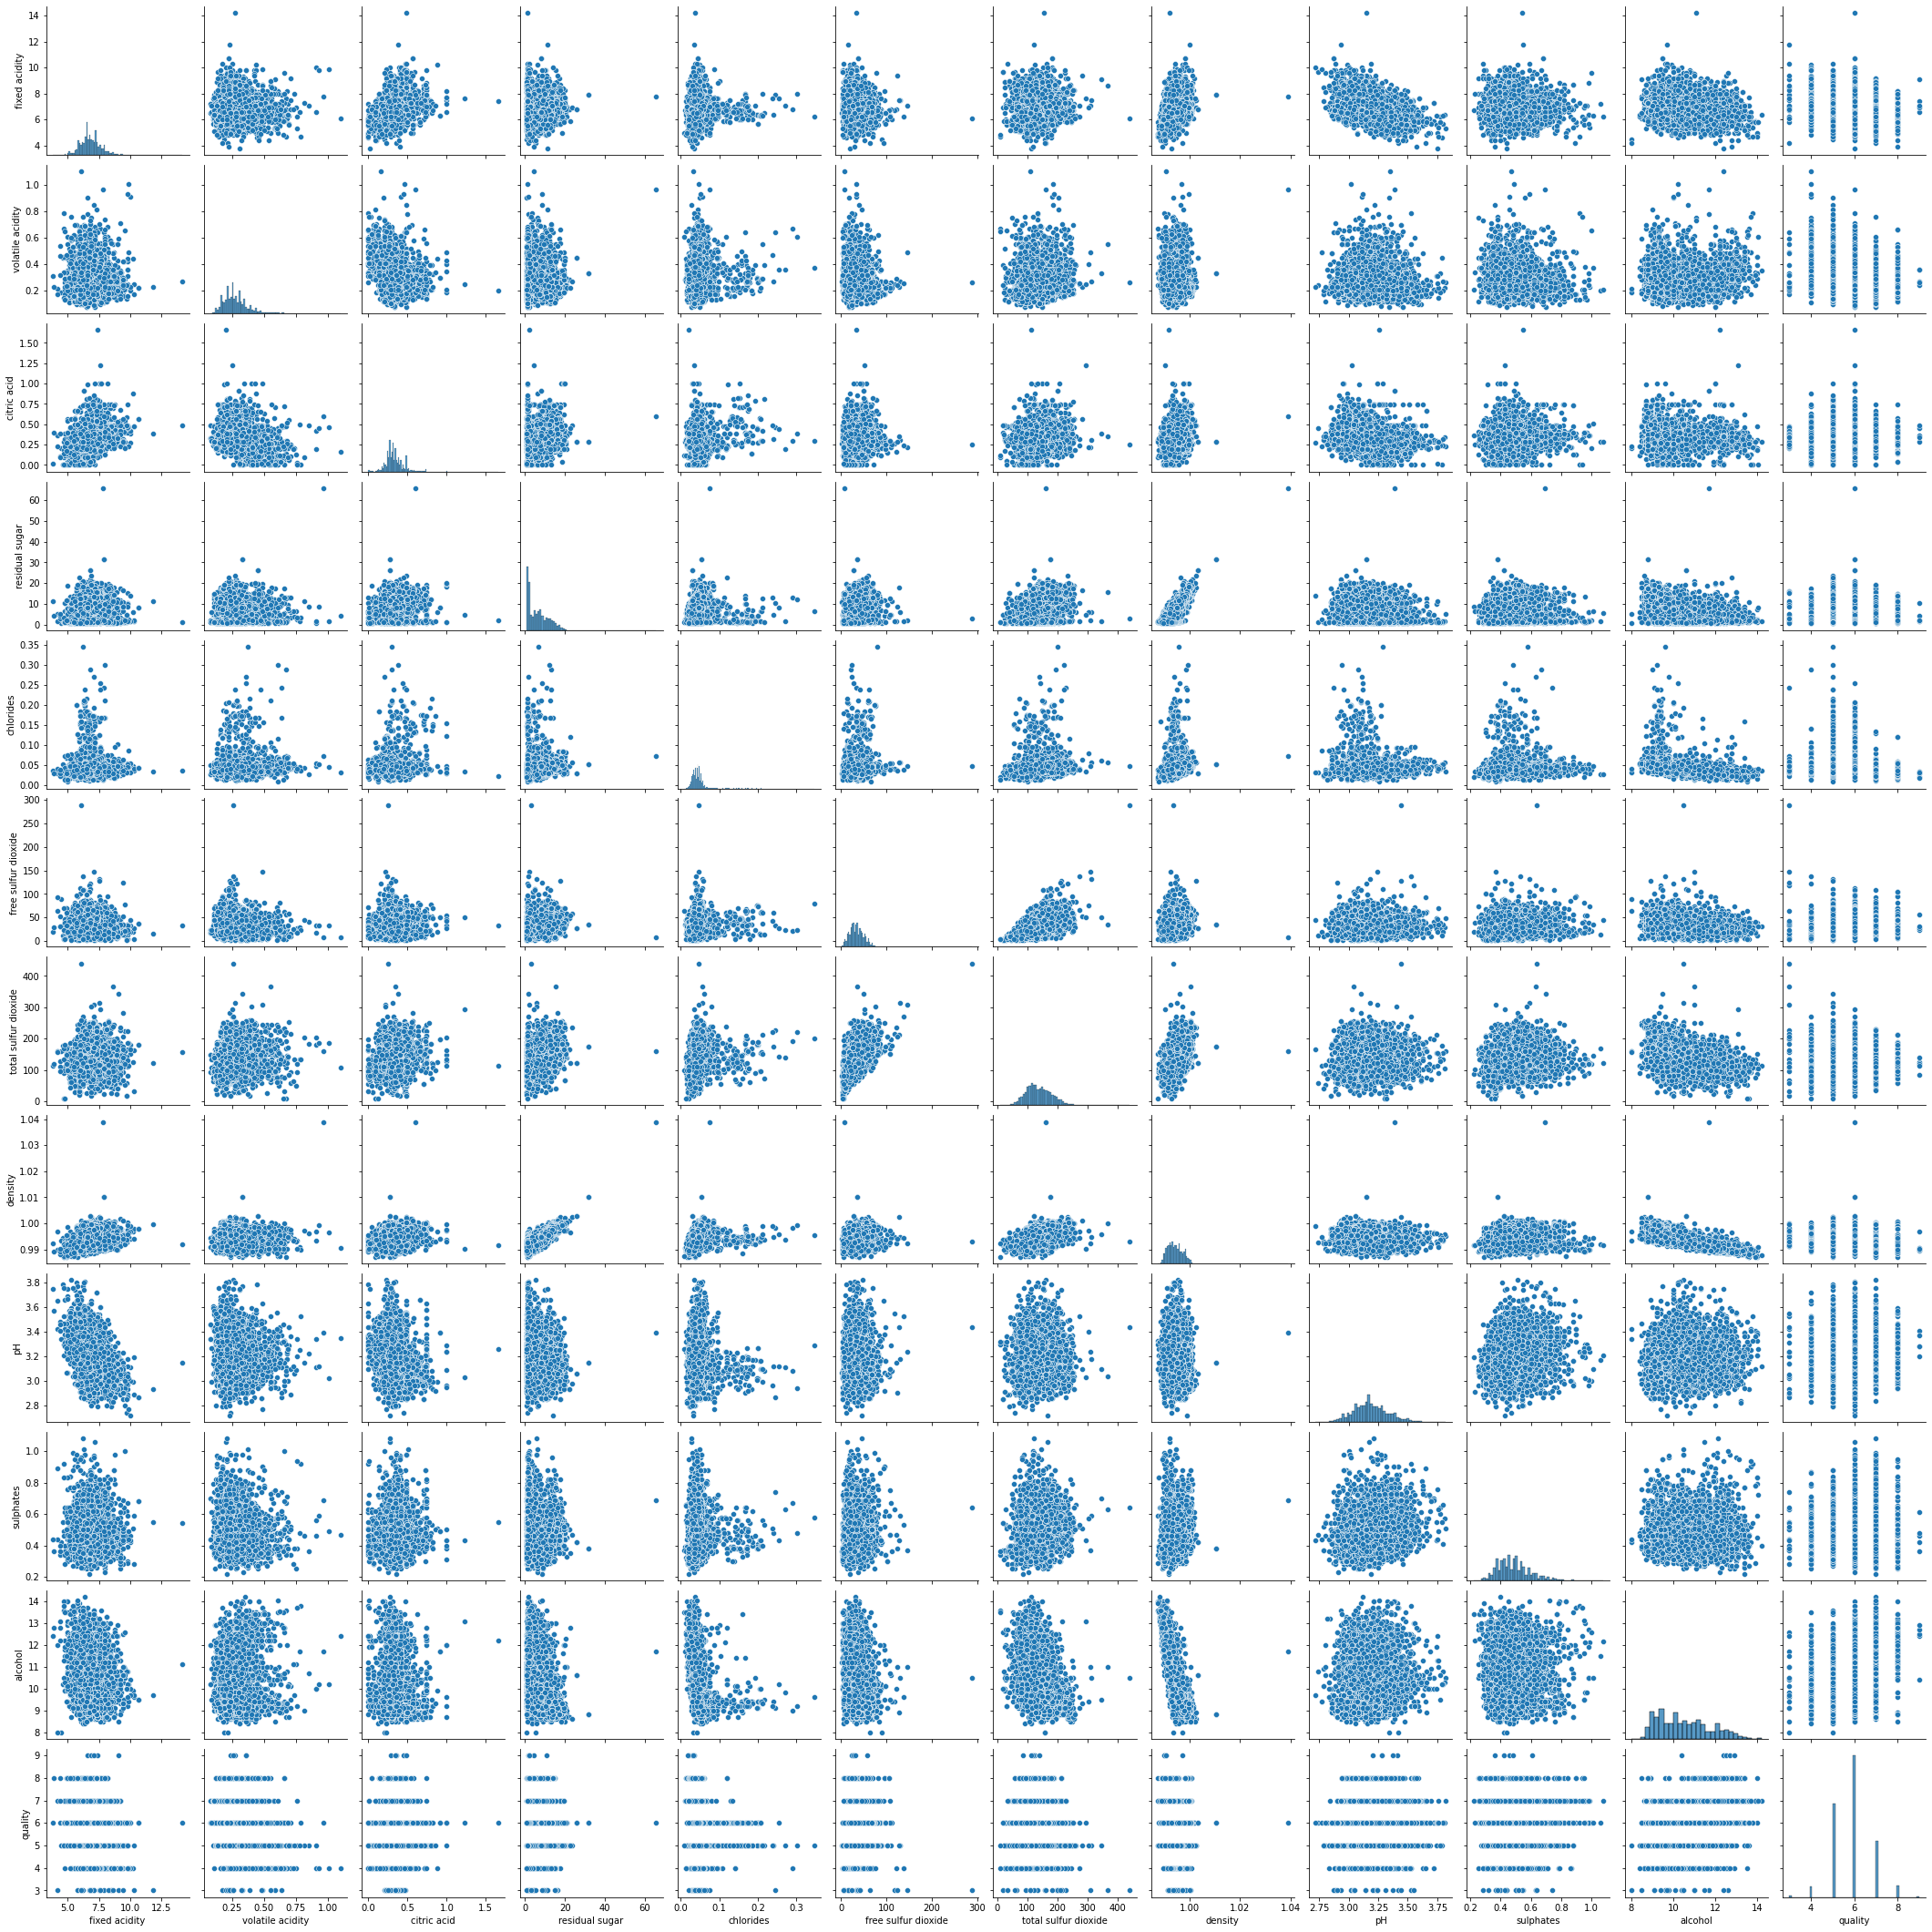

In [37]:
sns.pairplot(white_dataset)

**Why "spearman" and "kendall" as the chosen methods?**


*   Not all variables (columns) have normal distributions (linear), as seen on the histograms above.
*   Not all continuous data.
*   There also exist 'atypical' values (dots outside the congregation area) shown when plotting various variables above.
*   Can be seen some ordinal data.

**Spearman and Kendall Coefficients:**

Both are incredibly similar since they are non-parametric tests that measure a monotonic relationship using ranked data. 

Works with *linear* and *monotonic* relationships between the two variables.

**Monotonic realtionships** are where, the value of both variables increases or
as the value of one variable increases, the other variable value decreases but not exactly at a constant rate as would be for **linear relationsips**.

*References:*

*https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8*

*https://www.tessellationtech.io/data-science-stats-review/*

### Correlation Matrix for white wine dataset using "kendall":

In [38]:
white_dataset_corr = white_dataset.corr(method="kendall")
white_dataset_corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.029565     0.208569   
volatile acidity          -0.029565          1.000000    -0.104012   
citric acid                0.208569         -0.104012     1.000000   
residual sugar             0.074946          0.072757     0.015329   
chlorides                  0.065361         -0.003523     0.022292   
free sulfur dioxide       -0.016940         -0.054751     0.060809   
total sulfur dioxide       0.077272          0.081319     0.062188   
density                    0.185510          0.006600     0.061542   
pH                        -0.294796         -0.030385    -0.101307   
sulphates                 -0.008724         -0.011580     0.054489   
alcohol                   -0.073241          0.023495    -0.019981   
quality                   -0.065474         -0.154787     0.014557   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.074946   0.065361            -0.016940   
volatile acidity            0.072757  -0.003523            -0.054751   
citric acid                 0.015329   0.022292             0.060809   
residual sugar              1.000000   0.155274             0.236748   
chlorides                   0.155274   1.000000             0.113851   
free sulfur dioxide         0.236748   0.113851             1.000000   
total sulfur dioxide        0.293319   0.257075             0.444696   
density                     0.588989   0.349119             0.217295   
pH                         -0.125553  -0.037891            -0.005229   
sulphates                  -0.002545   0.062555             0.035621   
alcohol                    -0.305601  -0.404039            -0.182539   
quality                    -0.063087  -0.244856             0.017164   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.077272  0.185510 -0.294796  -0.008724   
volatile acidity                  0.081319  0.006600 -0.030385  -0.011580   
citric acid                       0.062188  0.061542 -0.101307   0.054489   
residual sugar                    0.293319  0.588989 -0.125553  -0.002545   
chlorides                         0.257075  0.349119 -0.037891   0.062555   
free sulfur dioxide               0.444696  0.217295 -0.005229   0.035621   
total sulfur dioxide              1.000000  0.388378 -0.008421   0.108697   
density                           0.388378  1.000000 -0.075630   0.064202   
pH                               -0.008421 -0.075630  1.000000   0.095823   
sulphates                         0.108697  0.064202  0.095823   1.000000   
alcohol                          -0.325826 -0.635104  0.102631  -0.026410   
quality                          -0.151230 -0.266598  0.084441   0.026403   

                       alcohol   quality  
fixed acidity        -0.073241 -0.065474  
volatile acidity      0.023495 -0.154787  
citric acid          -0.019981  0.014557  
residual sugar       -0.305601 -0.063087  
chlorides            -0.404039 -0.244856  
free sulfur dioxide  -0.182539  0.017164  
total sulfur dioxide -0.325826 -0.151230  
density              -0.635104 -0.266598  
pH                    0.102631  0.084441  
sulphates            -0.026410  0.026403  
alcohol               1.000000  0.346672  
quality               0.346672  1.000000

**Why "kendall" when comparing against the outcome "quality"?**

Chose the method "kendall" when comparing variables against "quality", since the "kendall" coefficient is also a test of strength of dependence (how well a variable could be written as a linear function of the other).

**Interpretation:**

*   Strong correlation: > 0.7 
*   Moderate correlation: 0.5 - 0.7
*   Weak correlation: < 0.4

**Conclusions:**

*   Correlation between *'pH'* and *'quality'* is equal to 0.099 and since this value is closer to 0, their correlation is **weak**.
*   Correlation between *'alcohol'* and *'quality'* is equal to 0.35 and since this is closer to 0.5, their correlation is considered to be **moderate**.
*   Correlation between *'density'* and *'quality'* is equal to -0.27 and since this is greater than 0.7, their correlation is considered to be **strong**.

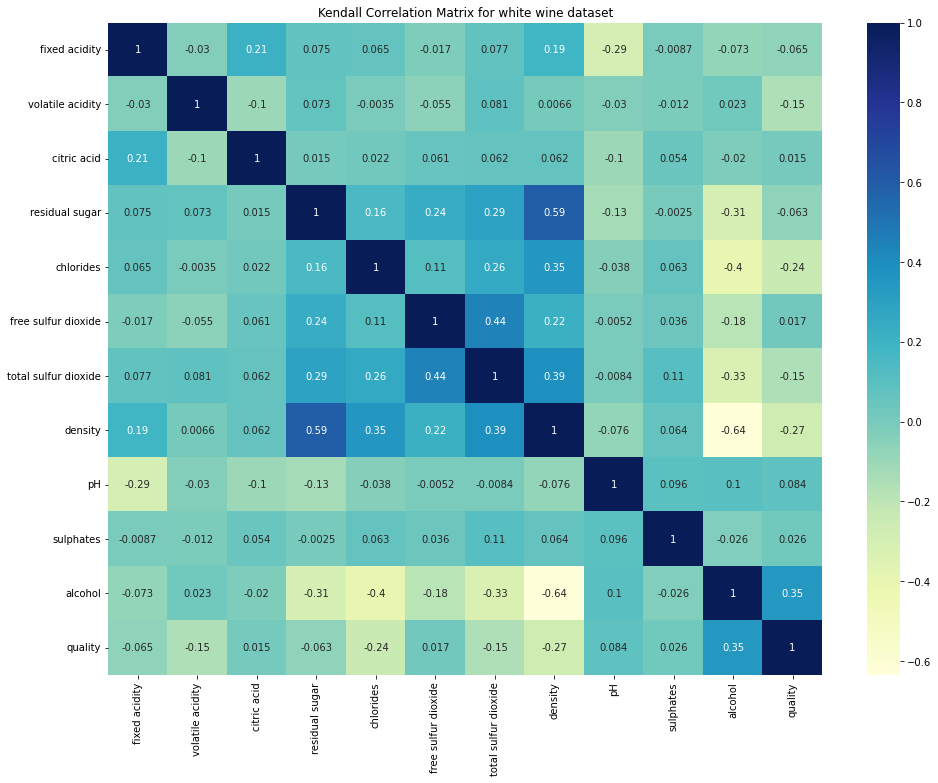

In [39]:
plt.figure(figsize=(16, 12))
plt.title("Kendall Correlation Matrix for white wine dataset")
sns.heatmap(white_dataset_corr, annot=True, cmap="YlGnBu")

**Interpretation:**

Ccoefficients range from -1 to +1. 

The sign of the coefficient indicates whether it is a positive or negative monotonic relationship.

*   **Negative**: as one variable increases, the other tends to decrease ( variables are inversely related).
*   **Positive**: as one variable increases, the other variable also tends to increase.
*   **0**: no relationship.

Values close to -1 or +1 represent ***stronger relationships*** than values closer to zero.

*References:*

*https://statisticsbyjim.com/basics/spearmans-correlation/*

*https://www.tessellationtech.io/data-science-stats-review/*

### Correlation Matrix for white wine dataset using "spearman":

In [40]:
white_dataset_columns = white_dataset.drop(['quality'], axis=1)
white_dataset_corr2 = white_dataset_columns.corr(method="spearman")
white_dataset_corr2

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.042865     0.297878   
volatile acidity          -0.042865          1.000000    -0.150410   
citric acid                0.297878         -0.150410     1.000000   
residual sugar             0.106725          0.108627     0.024621   
chlorides                  0.094691         -0.004934     0.032659   
free sulfur dioxide       -0.024542         -0.081213     0.088314   
total sulfur dioxide       0.112649          0.117614     0.093219   
density                    0.270031          0.010124     0.091425   
pH                        -0.418341         -0.045204    -0.146193   
sulphates                 -0.013238         -0.016902     0.079766   
alcohol                   -0.106827          0.033967    -0.029170   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.106725   0.094691            -0.024542   
volatile acidity            0.108627  -0.004934            -0.081213   
citric acid                 0.024621   0.032659             0.088314   
residual sugar              1.000000   0.227844             0.346107   
chlorides                   0.227844   1.000000             0.167046   
free sulfur dioxide         0.346107   0.167046             1.000000   
total sulfur dioxide        0.431252   0.375244             0.618616   
density                     0.780365   0.508302             0.327822   
pH                         -0.180028  -0.054006            -0.006274   
sulphates                  -0.003844   0.093931             0.052252   
alcohol                    -0.445257  -0.570806            -0.272569   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.112649  0.270031 -0.418341  -0.013238   
volatile acidity                  0.117614  0.010124 -0.045204  -0.016902   
citric acid                       0.093219  0.091425 -0.146193   0.079766   
residual sugar                    0.431252  0.780365 -0.180028  -0.003844   
chlorides                         0.375244  0.508302 -0.054006   0.093931   
free sulfur dioxide               0.618616  0.327822 -0.006274   0.052252   
total sulfur dioxide              1.000000  0.563824 -0.011829   0.157825   
density                           0.563824  1.000000 -0.110061   0.095079   
pH                               -0.011829 -0.110061  1.000000   0.140243   
sulphates                         0.157825  0.095079  0.140243   1.000000   
alcohol                          -0.476619 -0.821855  0.148857  -0.044868   

                       alcohol  
fixed acidity        -0.106827  
volatile acidity      0.033967  
citric acid          -0.029170  
residual sugar       -0.445257  
chlorides            -0.570806  
free sulfur dioxide  -0.272569  
total sulfur dioxide -0.476619  
density              -0.821855  
pH                    0.148857  
sulphates            -0.044868  
alcohol               1.000000

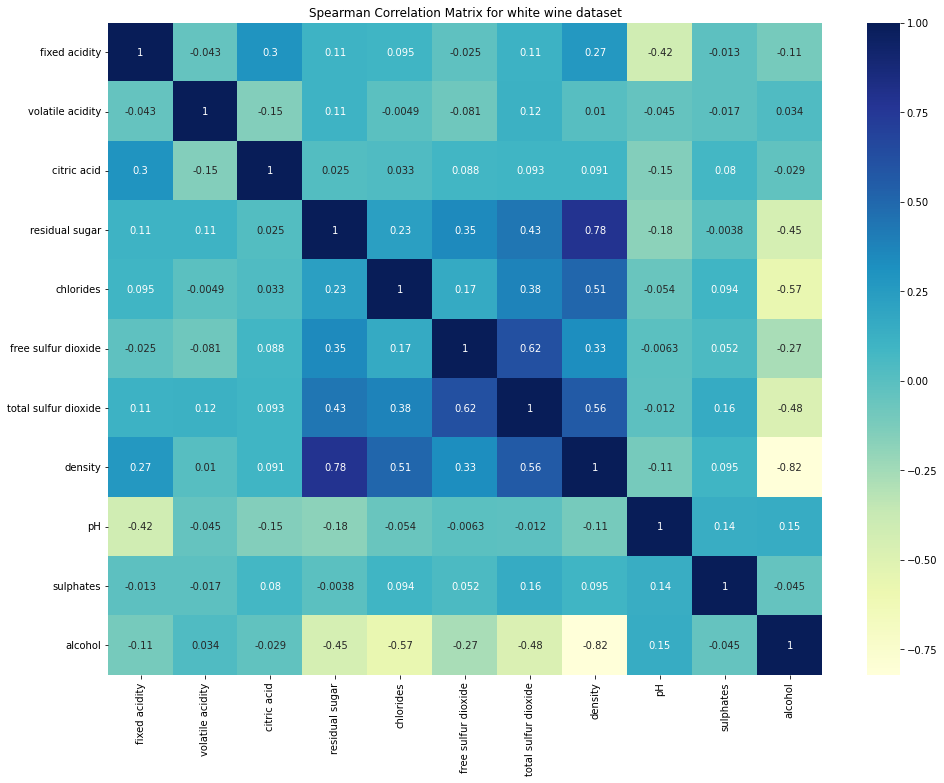

In [41]:
plt.figure(figsize=(16, 12))
plt.title("Spearman Correlation Matrix for white wine dataset")
sns.heatmap(white_dataset_corr2, annot=True, cmap="YlGnBu")

**Interpretation:**

Ccoefficients range from -1 to +1. 

The sign of the coefficient indicates whether it is a positive or negative monotonic relationship.

*   **Negative**: as one variable increases, the other tends to decrease ( variables are inversely related).
*   **Positive**: as one variable increases, the other variable also tends to increase.
*   **0**: no relationship.

Values close to -1 or +1 represent ***stronger relationships*** than values closer to zero.

*References:*

*https://statisticsbyjim.com/basics/spearmans-correlation/*

*https://www.tessellationtech.io/data-science-stats-review/*

**Conclusions:**

If we were to compare amongst the other wine characterics disregarding the outcome quality, we would identify that residual sugar and density (0.78) to be the highest correlated variables according to the “spearman” correlation matrix.

# **TASK 3**

## **Machine Learning Approaches for Wine Quality Prediction**

This section explores different machine learning strategies to predict wine quality, treating it as both a classification and regression problem.

### Classification Approach

Wine quality scores are grouped into two categories to simplify prediction:
- "low" quality: scores below 6
- "high" quality: scores 6 and above

Various thresholds can be tested to see how the model's performance changes.

**Machine Learning Modelling Cycle:**

*   Manage Data
*   Train Data
*   Evaluate Model
*   Deploy Model

In [42]:
red_dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality alcohol_cat isSweet  
0         9.4        5         mid     dry  
1         9.8        5         mid   sweet  
2         9.8        5         mid   sweet  
3         9.8        6         mid     dry  
4         9.4        5         mid     dry  
...       ...      ...         ...     ...  
1594     10.5        5         mid     dry  
1595     11.2        6         mid   sweet  
1596     11.0        6         mid   sweet  
1597     10.2        5         mid     dry  
1598     11.0        6         mid   sweet  

[1599 rows x 14 columns]

In [43]:
white_dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality alcohol_cat isSweet  
0         8.8        6         low   sweet  
1         9.5        6         mid     dry  
2        10.1        6         mid   sweet  
3         9.9        6         mid   sweet  
4         9.9        6         mid   sweet  
...       ...      ...         ...     ...  
4893     11.2        6         mid     dry  
4894      9.6        5         mid   sweet  
4895      9.4        6         mid     dry  
4896     12.8        7        high     dry  
4897     11.8        6        high     dry  

[4898 rows x 14 columns]

#### Data Preparation

The datasets are cleaned by removing columns that duplicate information (such as "alcohol_cat" and "isSweet"). The "quality" column is replaced with a new "quality_level" column containing only "low" and "high" labels.

Steps:
1.   Drop columns "alcohol_cat" and "isSweet" since they contain duplicate values from the "quality" and "residual_sugar" labels respectively and therefore not necessary for the building the model.

2.   Reduce the "quality" label to just two possible labels:

*   If "quality" < 6: 'low'
*   If "quality" >= 6: 'high'

3.   Drop the "quality" column since it will be replaced by the "quality_level" column, which will only contain two labels: 'low' or 'high'.

In [44]:
red_dataset = red_dataset.drop(['alcohol_cat'], axis=1)
red_dataset = red_dataset.drop(['isSweet'], axis=1)


quality_level = []
for v in red_dataset["quality"]:
    if v < 6:
      quality_level.append("low")
    else:
      quality_level.append("high")
red_dataset["quality_level"] = quality_level


red_dataset = red_dataset.drop(['quality'], axis=1)
red_dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol quality_level  
0         9.4           low  
1         9.8           low  
2         9.8           low  
3         9.8          high  
4         9.4           low  
...       ...           ...  
1594     10.5           low  
1595     11.2          high  
1596     11.0          high  
1597     10.2           low  
1598     11.0          high  

[1599 rows x 12 columns]

In [45]:
white_dataset = white_dataset.drop(['alcohol_cat'], axis=1)
white_dataset = white_dataset.drop(['isSweet'], axis=1)


quality_level = []
for v in white_dataset["quality"]:
    if v < 6:
      quality_level.append("low")
    else:
      quality_level.append("high")
white_dataset["quality_level"] = quality_level


white_dataset = white_dataset.drop(['quality'], axis=1)
white_dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol quality_level  
0         8.8          high  
1         9.5          high  
2        10.1          high  
3         9.9          high  
4         9.9          high  
...       ...           ...  
4893     11.2          high  
4894      9.6           low  
4895      9.4          high  
4896     12.8          high  
4897     11.8          high  

[4898 rows x 12 columns]

In [46]:
red_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_level'],
      dtype='object')

#### Splitting Data

Features and target labels are separated, and the data is split into training and test sets (80% train, 20% test) using a fixed random state for reproducibility.

Separate characteristics columns and objective/outcome column ("quality_level"):

1.   Set variable "data" = to all columns expect the column we want to predict ("quality_level").
2.   Assing variable "labels" = to "quality_level" as it is the column to be predicted by the model.

Split data between train and test data:

*   Train data size = 80% of the dataset.
*   Test data size = 20% of dataset.
*   Random state = 42

Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced.Therefore, the Shuffling of data randomly in any datasets is necessary in order not to bring the biases in the data prediction.

#### Red dataset:

In [47]:
data = red_dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [48]:
labels = red_dataset['quality_level']
labels.head()

0     low
1     low
2     low
3    high
4     low
Name: quality_level, dtype: object

In [49]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(data,labels,test_size=0.2, random_state=42)

#### White dataset:

In [50]:
data_white = white_dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
labels_white = white_dataset['quality_level']

In [51]:
from sklearn.model_selection import train_test_split
w_data_train, w_data_test, w_labels_train, w_labels_test = train_test_split(data_white,labels_white,test_size=0.2, random_state=42)

#### Balancing and Scaling

To address class imbalance, SMOTE oversampling is applied to the training data. Features are then scaled to have zero mean and unit variance, which helps many machine learning models perform optimally.

**Oversampling the Dataset (SMOTE)**

Now we have our dataset in a form useable to train a model on. Now, we need to make sure our dataset is balanced. 

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10)
data_train, labels_train = smote.fit_resample(data_train,labels_train)

In [53]:
from imblearn.over_sampling import SMOTE

w_smote = SMOTE(random_state = 10)
w_data_train, w_labels_train = w_smote.fit_resample(w_data_train,w_labels_train)

**Data Scaling:**

This processes forces our data to have a mean of 0 and a variance of 1, and is required to allow for optimal performance of many common machine learning models.

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

data_train_scaled = scaler.transform(data_train)
data_test_scaled = scaler.transform(data_test)

In [55]:
from sklearn.preprocessing import StandardScaler

w_scaler = StandardScaler()
w_scaler.fit(w_data_train)

w_data_train_scaled = w_scaler.transform(w_data_train)
w_data_test_scaled = w_scaler.transform(w_data_test)

### Model Training

Two models are trained and evaluated:
- **Logistic Regression:** A simple and interpretable model for binary classification.
- **Support Vector Machine (SVM):** Suitable for both linear and non-linear decision boundaries.

Performance is assessed using accuracy, classification reports, and confusion matrices.

#### **Training Model 1: Logistic Regression**

Now that we have our synthetic data in a useable form, it is time to look at how the train statistical models.

One of the most basic forms of machine learning is logistic regression. This method is very similar to linear regression, except it outputs a binary variable rather than something continuous.

Logistic regression works well for the this data, as we are aiming to classify a data point into one of two classes.

#### Red Dataset:

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

penalty = 'l2'
C = 1
solver = 'lbfgs'
multi_class = 'ovr'

logistic_regression = LogisticRegression(penalty = penalty,
                                         C = C,
                                         solver = solver,
                                         multi_class = multi_class)

logistic_regression.fit(data_train_scaled, labels_train)

logistic_regression_label_predictions = logistic_regression.predict(data_test_scaled)

test_acc = accuracy_score(labels_test, logistic_regression_label_predictions)
print(f"Logistic regression test accuracy for red dataset: {test_acc * 100}%")

print(classification_report(labels_test, logistic_regression_label_predictions))

Logistic regression test accuracy for red dataset: 74.0625%
              precision    recall  f1-score   support

        high       0.80      0.72      0.76       179
         low       0.68      0.77      0.72       141

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



**Confusion matrix:**

Confusion matrix is a matrix that allows you to visualize the performance of the classification machine learning models.

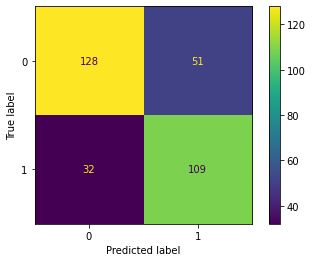

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(labels_test,logistic_regression_label_predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

#### White Dataset:

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

penalty = 'l2'
C = 1
solver = 'lbfgs'
multi_class = 'ovr'

w_logistic_regression = LogisticRegression(penalty = penalty,
                                         C = C,
                                         solver = solver,
                                         multi_class = multi_class)

w_logistic_regression.fit(w_data_train_scaled, w_labels_train)

w_logistic_regression_label_predictions = w_logistic_regression.predict(w_data_test_scaled)

test_acc = accuracy_score(w_labels_test, w_logistic_regression_label_predictions)
print(f"Logistic regression test accuracy for white dataset: {test_acc * 100}%")

print(classification_report(w_labels_test, w_logistic_regression_label_predictions))

Logistic regression test accuracy for white dataset: 72.34693877551021%
              precision    recall  f1-score   support

        high       0.85      0.72      0.78       659
         low       0.56      0.73      0.63       321

    accuracy                           0.72       980
   macro avg       0.70      0.73      0.71       980
weighted avg       0.75      0.72      0.73       980



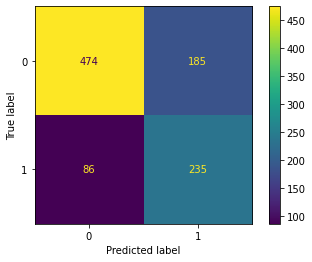

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(w_labels_test,w_logistic_regression_label_predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

#### **Training Model 2: SVM**

There are lots of different models which a data scientist can utilise, each with their own strengths and weaknesses depening on the data. 

For binary classification, we can also make use of **Support Vector Machine (SVM)** which *sklearn* contains along with multiple others model implementations. 

**SVMs** can be utilised for both linearly and non-linearly separable data, although sklearn dictates the use of two different functions depening.

#### Red Dataset:

In [60]:
C = 100
kernel = 'poly'
random_state = 10
degree = 10
coef0 = 9

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

svm = SVC(kernel = kernel, degree = degree, C = C, coef0 = coef0, random_state = 10)
svm.fit(data_train_scaled, labels_train)
svm_predictions = svm.predict(data_test_scaled)

print(classification_report(labels_test,svm_predictions))

test_acc = accuracy_score(labels_test, svm_predictions)
print(f"Test acc: {test_acc * 100}%")

              precision    recall  f1-score   support

        high       0.72      0.78      0.75       179
         low       0.69      0.62      0.65       141

    accuracy                           0.71       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.70      0.71      0.70       320

Test acc: 70.625%


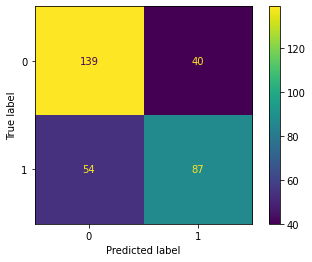

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_svm = confusion_matrix(labels_test,svm_predictions)

cm_svm_display = ConfusionMatrixDisplay(cm_svm).plot()

#### White Dataset:

In [62]:
C = 100
kernel = 'poly'
random_state = 10
degree = 10
coef0 = 9

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

w_svm = SVC(kernel = kernel, random_state = 10)
w_svm.fit(w_data_train_scaled, w_labels_train)
w_svm_predictions = w_svm.predict(w_data_test_scaled)

print(classification_report(w_labels_test,w_svm_predictions))

test_acc = accuracy_score(w_labels_test, w_svm_predictions)
print(f"Test acc: {test_acc * 100}%")

              precision    recall  f1-score   support

        high       0.86      0.72      0.78       659
         low       0.57      0.75      0.65       321

    accuracy                           0.73       980
   macro avg       0.71      0.74      0.71       980
weighted avg       0.76      0.73      0.74       980

Test acc: 73.06122448979592%


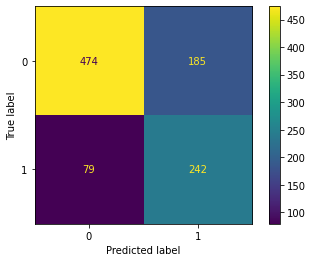

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

w_cm_svm = confusion_matrix(w_labels_test,w_svm_predictions)

w_cm_svm_display = ConfusionMatrixDisplay(w_cm_svm).plot()

#### **Preventing Overfitting**

One big problem faced by data science models is that of overfitting. This occurs when the trained model has been unable to generalise well with the training data we have provided it. If this happens, our model will perform very well on the training set, but perform worse on the test set.

Check SVM for overfitting. Do this by predicting on the train set, generating an accuracy score, and comparing it to the test set accuracy.

In [64]:
svm_predictions2 = svm.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, svm_predictions2)
test_acc = accuracy_score(labels_test, svm_predictions)

print("Red dataset:")
print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Red dataset:
Train acc: 100.0%
Test acc: 70.625%


In [65]:
w_svm_predictions2 = w_svm.predict(w_data_train_scaled)
train_acc = accuracy_score(w_labels_train, w_svm_predictions2)
test_acc = accuracy_score(w_labels_test, w_svm_predictions)

print("White dataset:")
print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

White dataset:
Train acc: 77.91458253174298%
Test acc: 73.06122448979592%


Based on these results, almost certainly there is overfitting for the red dataset. We can tell this because of the 100% training accuracy, but only 70%  accuracy on the test set. This is likely our hyperparameters.

#### **Hyperparameter Tuning**

#### Red Dataset:

In [66]:
from sklearn.model_selection import GridSearchCV

number_of_folds = 5
random_state = 10

parameters_to_tune = [{'kernel': ['poly', 'rbf'],
                      'C': [1, 10],
                      'coef0': [1, 9]}]

search = GridSearchCV(SVC(random_state = random_state), parameters_to_tune, cv = number_of_folds)
search.fit(data_train_scaled, labels_train)

print(f"Best parameters set found: {search.best_params_}")

Best parameters set found: {'C': 10, 'coef0': 1, 'kernel': 'poly'}


We have found a set of hyperparameters that the search believes will reduce overfitting and improve our test set accuracy the most! Let's train a model using the found parameters and check.

In [67]:
svm2 = SVC(kernel = search.best_params_['kernel'],
                     C = search.best_params_['C'],
                     coef0 = search.best_params_['coef0'], random_state = 10)
svm2.fit(data_train_scaled, labels_train)

svm2_predictions = svm2.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, svm2_predictions)

svm2_predictions = svm2.predict(data_test_scaled)
test_acc = accuracy_score(labels_test, svm2_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

print(classification_report(labels_test,svm2_predictions))

Train acc: 85.6508875739645%
Test acc: 76.875%
              precision    recall  f1-score   support

        high       0.80      0.78      0.79       179
         low       0.73      0.76      0.74       141

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



As predicted, the red dataset was indeed affected by an overfitting. Therefore when applying hyperparameter tuning and cross validation, we see that the accuracy improves from 70% to 76.8%.

#### White Dataset:

In [68]:
from sklearn.model_selection import GridSearchCV

number_of_folds = 5
random_state = 10

parameters_to_tune = [{'kernel': ['rbf'],
                      'C': [1, 10],
                      'coef0': [1, 9]}]

w_search = GridSearchCV(SVC(random_state = random_state), parameters_to_tune, cv = number_of_folds, verbose=1)
w_search.fit(w_data_train_scaled, w_labels_train)

print(f"Best parameters set found: {w_search.best_params_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters set found: {'C': 10, 'coef0': 1, 'kernel': 'rbf'}


In [69]:
w_svm2 = SVC(kernel = w_search.best_params_['kernel'],
                     C = search.best_params_['C'],
                     coef0 = search.best_params_['coef0'], random_state = 10)
w_svm2.fit(w_data_train_scaled, w_labels_train)

w_svm2_predictions = w_svm2.predict(w_data_train_scaled)
train_acc = accuracy_score(w_labels_train, w_svm2_predictions)

w_svm2_predictions = svm2.predict(w_data_test_scaled)
test_acc = accuracy_score(w_labels_test, w_svm2_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

print(classification_report(w_labels_test,w_svm2_predictions))

Train acc: 86.64871104270874%
Test acc: 61.224489795918366%
              precision    recall  f1-score   support

        high       0.79      0.58      0.67       659
         low       0.44      0.69      0.54       321

    accuracy                           0.61       980
   macro avg       0.62      0.63      0.60       980
weighted avg       0.68      0.61      0.62       980



As expected, the white dataset is not affected by the overfitting problem and therefore when trying to fix it, the accuracy score is worsened. 

### Regression Approach

Wine quality is also treated as a continuous variable for regression analysis.

In [70]:
red_path = 'datasets/winequality-red.csv'
red_dataset = pd.read_csv(red_path, header = 0, delimiter = ";")
red_dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [71]:
white_path = 'datasets/winequality-white.csv'
white_dataset = pd.read_csv(white_path, header = 0, delimiter = ";")
white_dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

#### Data Preparation

Features and target labels ("quality") are separated. The data is split into training and test sets, balanced using SMOTE, and scaled.

#### Splitting Data into sets:

Separated characteristics columns and objective/outcome column ("quality"):

1.   Set variable "data" = to all columns expect the column we want to predict ("quality").
2.   Assing variable "labels" = to "quality" as it is the column to be predicted by the model.

Splitted data between train and test data:

*   Train data size = 80% of the dataset.
*   Test data size = 20% of dataset.
*   Random state = 42

Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced. Therefore, the Shuffling of data randomly in any datasets is necessary in order not to bring the biases in the data prediction.

#### Red Dataset:

In [72]:
data2 = red_dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
labels2 = red_dataset['quality']

In [73]:
data_train2, data_test2, labels_train2, labels_test2 = train_test_split(data2,labels2,test_size=0.2, random_state=42)

#### White Dataset:

In [74]:
w_data2 = white_dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
w_labels2 = white_dataset['quality']

In [75]:
w_data_train2, w_data_test2, w_labels_train2, w_labels_test2 = train_test_split(w_data2,w_labels2,test_size=0.2, random_state=42)

#### **Oversampling the Dataset (SMOTE)**

Now we have our dataset in a form useable to train a model on. Now, we need to make sure our dataset is balanced.

In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10, k_neighbors=2)

data_train2, labels_train2 = smote.fit_resample(data_train2,labels_train2)

w_smote = SMOTE(random_state = 10, k_neighbors=2)

w_data_train2, w_labels_train2 = w_smote.fit_resample(w_data_train2,w_labels_train2)

#### **Data Scaling:**

This processes forces our data to have a mean of 0 and a variance of 1, and is required to allow for optimal performance of many common machine learning models.


In [77]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
scaler2.fit(data_train2)

data_train_scaled2 = scaler2.transform(data_train2)
data_test_scaled2 = scaler2.transform(data_test2)

In [78]:
from sklearn.preprocessing import StandardScaler

w_scaler2 = StandardScaler()
w_scaler2.fit(w_data_train2)

w_data_train_scaled2 = w_scaler2.transform(w_data_train2)
w_data_test_scaled2 = w_scaler2.transform(w_data_test2)

### **Training Model 1: Linear Regression**

A linear regression model is trained to predict the continuous quality score. Model performance is visualized using distribution plots of prediction errors.


#### Red Dataset:

In [79]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(data_train_scaled2, labels_train2)
linear_regression_predictions = linear_regression.predict(data_test_scaled2)

To see how the model predicts, we have plotted a bar chart to see if there is a normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


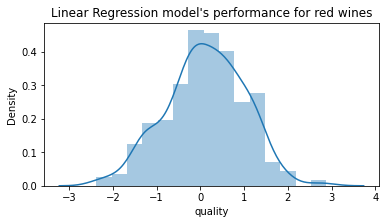

In [80]:
plt.figure(figsize=(6, 3))
plt.title("Linear Regression model's performance for red wines")
sns.distplot(labels_test2 - linear_regression_predictions)

#### White Dataset:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


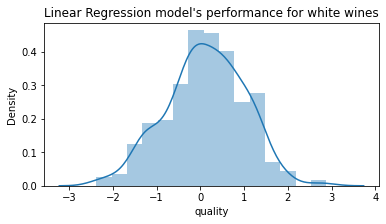

In [81]:
from sklearn.linear_model import LinearRegression
w_linear_regression = LinearRegression()
w_linear_regression.fit(w_data_train_scaled2, w_labels_train2)
w_linear_regression_predictions = w_linear_regression.predict(w_data_test_scaled2)
plt.figure(figsize=(6, 3))
plt.title("Linear Regression model's performance for white wines")
sns.distplot(labels_test2 - linear_regression_predictions)

# **TASK 4**

## **Evaluating Model Performance with k-Fold Cross Validation**

Model evaluation is carried out using k-fold cross validation, which helps to assess how well each model generalizes to unseen data. This approach provides a more robust estimate of model accuracy and reliability by repeatedly splitting the data into training and test sets.

For classification models, metrics such as accuracy, F1-score, ROC curves, and AUC are used to summarize performance. For regression models, mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) are reported to quantify prediction errors.


In [82]:
from sklearn.model_selection import cross_val_score

## **k-fold cross validation**

### k-Fold Cross Validation

k-fold cross validation divides the dataset into k equal parts, training the model on k-1 folds and testing on the remaining fold. This process is repeated k times, and the average performance across all folds is calculated. This method helps to reduce bias and variance in the evaluation results.

Notes:

It is a data partitioning strategy that can effectively be used on a dataset to build a more generalized model.
The main intention of doing any kind of machine learning is to develop a more generalized model which can perform well on unseen data.

*Reference: https://machinelearningmastery.com/k-fold-cross-validation/*

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

*Reference: https://towardsdatascience.com/k-fold-cross-validation-explained-in-plain-english-659e33c0bc0*

### Classification Models

- Logistic Regression and Support Vector Machine (SVM) models are evaluated on both red and white wine datasets.
- Performance is summarized using mean accuracy and standard deviation across folds for both training and test sets.
- F1-score is used to balance precision and recall, especially important for imbalanced datasets.

#### Logistic Regression model:


#### Red Dataset:

In [83]:
scores_train = cross_val_score(logistic_regression, data_train_scaled, labels_train, cv=7, scoring='accuracy')
scores_test = cross_val_score(logistic_regression, data_test_scaled, labels_test, cv=7, scoring='accuracy')

print("Logistic Regression model's performance on:")
print("Red wine training set: %0.2f mean, with a standard deviation of %0.2f" % (scores_train.mean(), scores_train.std()))
print("Red wine test set: %0.2f mean, with a standard deviation of %0.2f" % (scores_test.mean(), scores_test.std()))

Logistic Regression model's performance on:
Red wine training set: 0.74 mean, with a standard deviation of 0.04
Red wine test set: 0.73 mean, with a standard deviation of 0.03


#### White Dataset:

In [84]:
w_scores_train = cross_val_score(w_logistic_regression, w_data_train_scaled, w_labels_train, cv=7)
w_scores_test = cross_val_score(w_logistic_regression, w_data_test_scaled, w_labels_test, cv=7)

print("Logistic Regression model's performance on:")
print("White wine training set: %0.2f accuracy, with a standard deviation of %0.2f" % (w_scores_train.mean(), w_scores_train.std()))
print("White wine test set: %0.2f accuracy, with a standard deviation of %0.2f" % (w_scores_test.mean(), w_scores_test.std()))

Logistic Regression model's performance on:
White wine training set: 0.73 accuracy, with a standard deviation of 0.01
White wine test set: 0.75 accuracy, with a standard deviation of 0.03


### Support Vector Machine model (using SVC):

#### Red Dataset:

In [85]:
print("SVC model's performance on:")

scores_train_svm = cross_val_score(svm, data_train_scaled, labels_train, cv=5)
scores_train_svm
print("Red wine training set: %0.2f accuracy, with a standard deviation of %0.2f" % (scores_train_svm.mean(), scores_train_svm.std()))

scores_test_svm = cross_val_score(svm, data_test_scaled, labels_test, cv=5)
scores_test_svm
print("Red wine test set: %0.2f accuracy, with a standard deviation of %0.2f" % (scores_test_svm.mean(), scores_test_svm.std()))

SVC model's performance on:
Red wine training set: 0.75 accuracy, with a standard deviation of 0.02
Red wine test set: 0.63 accuracy, with a standard deviation of 0.01


#### White Dataset:

In [86]:
print("SVC model's performance on:")

w_scores_train_svm = cross_val_score(w_svm, w_data_train_scaled, w_labels_train, cv=5)
print("White wine training set: %0.2f mean, with a standard deviation of %0.2f" % (w_scores_train_svm.mean(), w_scores_train_svm.std()))

w_scores_test_svm = cross_val_score(w_svm, w_data_test_scaled, w_labels_test, cv=5)
print("White wine test set: %0.2f mean, with a standard deviation of %0.2f" % (w_scores_test_svm.mean(), w_scores_test_svm.std()))

SVC model's performance on:
White wine training set: 0.75 mean, with a standard deviation of 0.01
White wine test set: 0.71 mean, with a standard deviation of 0.02


A binary classifier can be evaluated using:

**f1-score** (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) , 

**ROC curves** (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html), 

**AUC** (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) .

## **f-1 score**

The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’.

The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

*Reference: https://deepai.org/machine-learning-glossary-and-terms/f-score*

### Logistic Regression model:

In [87]:
from sklearn import metrics
print("F-1 Score on red wine dataset:")
print("Logistic Regression model accuracy = %0.2f" % (metrics.f1_score(labels_test, logistic_regression_label_predictions, average='macro')))

F-1 Score on red wine dataset:
Logistic Regression model accuracy = 0.74


In [88]:
print("F-1 Score on white wine dataset:")
print("Logistic Regression model accuracy = %0.2f" % (metrics.f1_score(w_labels_test, w_logistic_regression_label_predictions, average='macro')))

F-1 Score on white wine dataset:
Logistic Regression model accuracy = 0.71


### Support Vector Machine model (using SVC):

In [89]:
print("F-1 Score on red wine dataset:")
print("SVC model accuracy = %0.2f" % (metrics.f1_score(labels_test, svm_predictions, average='macro')))

F-1 Score on red wine dataset:
SVC model accuracy = 0.70


In [90]:
print("F-1 Score on white wine dataset:")
print("SVC model accuracy = %0.2f" % (metrics.f1_score(w_labels_test, w_svm_predictions, average='macro')))

F-1 Score on white wine dataset:
SVC model accuracy = 0.71


## **Evaluation metrics for Linear Regression Model**

Evaluation metrics are a measure of how good a model performs and how well it approximates the relationship. 

#### Red Dataset:

**Mean Absolute Error (MAE):**

It is the average of the absolute differences between the actual value and the model’s predicted value.

A small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas. MAE of 0 means that your model is a perfect predictor of the outputs.

*Reference: https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af*

In [91]:
from sklearn import metrics
print("Mean Absolute Error (MAE):",metrics.mean_absolute_error(labels_test2, linear_regression_predictions))

Mean Absolute Error (MAE): 0.7270382118687494


**Mean Squared Error (MSE):**

It is the average of the squared differences between the actual and the predicted values.

Lower the value, the better the regression model.

In [92]:
print("Mean Squared Error (MSE):", metrics.mean_squared_error(labels_test2, linear_regression_predictions))

Mean Squared Error (MSE): 0.8177824919543223


**Root Mean Squared Error (RMSE):**

It is the average root-squared difference between the real value and the predicted value. By taking a square root of MSE, we get the Root Mean Square Error.

We want the value of RMSE to be as low as possible, as lower the RMSE value is, the better the model is with its predictions. A Higher RMSE indicates that there are large deviations between the predicted and actual value.

In [93]:
print("Root Mean Squared Error (RMSE):", metrics.mean_squared_error(labels_test2, linear_regression_predictions, squared=False))

Root Mean Squared Error (RMSE): 0.9043132709157388


#### White Dataset:

In [94]:
from sklearn import metrics

print("Mean Absolute Error (MAE):",metrics.mean_absolute_error(w_labels_test2, w_linear_regression_predictions))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(w_labels_test2, w_linear_regression_predictions))
print("Root Mean Squared Error (RMSE):", metrics.mean_squared_error(w_labels_test2, w_linear_regression_predictions, squared=False))

Mean Absolute Error (MAE): 0.8099645675228588
Mean Squared Error (MSE): 1.0762493148312016
Root Mean Squared Error (RMSE): 1.03742436583647


# **EXTENSIONS** 

## **Extension 1**

**Additional descriptive analysis:**

Using both isSweet and alcohol_cat, created suitable plots to characterise quality with respect to these two variables.

### Datasets

In [95]:
red_dataset2 = pd.read_csv(red_path, header = 0, delimiter = ";")
red_dataset2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [96]:
white_dataset2 = pd.read_csv(white_path, header = 0, delimiter = ";")
white_dataset2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [97]:
alcohol_cat_red = []
alcohol_cat_white = []

for v in red_dataset2["alcohol"]:
  if v <= (avg_red - std_red):
    alcohol_cat_red.append("low")
  elif v >= (avg_red + std_red) :
    alcohol_cat_red.append("mid")
  else:
    alcohol_cat_red.append("high")


for v in white_dataset2["alcohol"]:
  if v <= (avg_white - std_white):
    alcohol_cat_white.append("low")
  elif v >= (avg_white + std_white) :
    alcohol_cat_white.append("mid")
  else:
    alcohol_cat_white.append("high")

red_dataset2["alcohol_cat"] = alcohol_cat_red
white_dataset2["alcohol_cat"] = alcohol_cat_white

In [98]:
isSweet_red = []
isSweet_white = []

for v in red_dataset["residual sugar"]:
    if v < mid_red:
       isSweet_red.append("dry")
    else:
       isSweet_red.append("sweet")

for v in white_dataset["residual sugar"]:
  if v < mid_white:
     isSweet_white.append("dry")
  else:
     isSweet_white.append("sweet")


red_dataset2["isSweet"] = isSweet_red
white_dataset2["isSweet"] = isSweet_white

In [99]:
red_dataset2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality alcohol_cat isSweet  
0      9.4        5        high     dry  
1      9.8        5        high   sweet  
2      9.8        5        high   sweet  
3      9.8        6        high     dry  
4      9.4        5        high     dry

In [100]:
white_dataset2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality alcohol_cat isSweet  
0      8.8        6         low   sweet  
1      9.5        6        high     dry  
2     10.1        6        high   sweet  
3      9.9        6        high   sweet  
4      9.9        6        high   sweet

#### Plots "quality" for each dataset separately

Using both isSweet and alcohol_cat, created suitable plots to characterise quality with respect to these two variables.



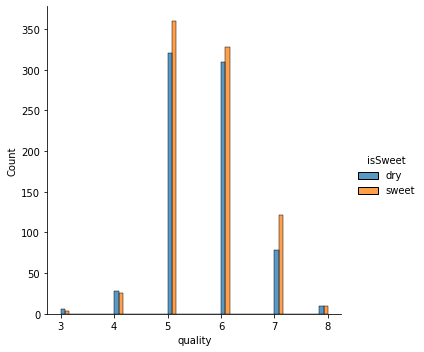

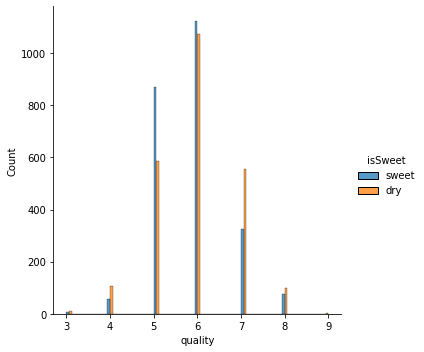

In [101]:
sns.displot(red_dataset2, x="quality", hue="isSweet", multiple="dodge")
sns.displot(white_dataset2, x="quality", hue="isSweet", multiple="dodge")

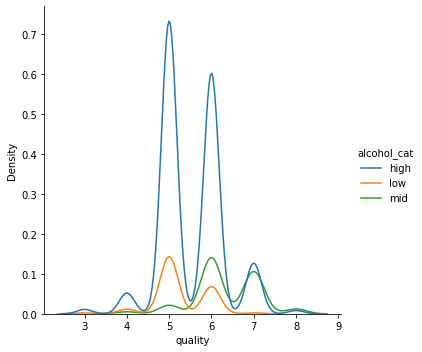

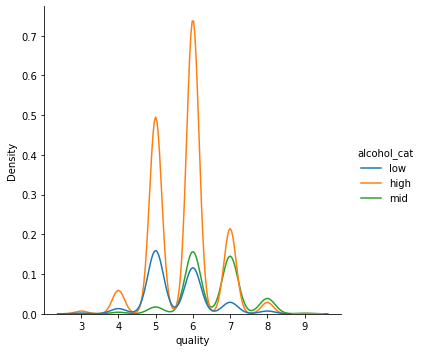

In [102]:
sns.displot(red_dataset2, x="quality", hue="alcohol_cat", kind="kde")
sns.displot(white_dataset2, x="quality", hue="alcohol_cat", kind="kde")

1.   Concatenated both datasets at row level.

2.   Re-indexed the resulting dataframe (in order to avoid duplicated indexes)

3.   Verified that the new dataset contains the concatenated datasets (total = sum of red and wine datasets)

In [103]:
wines_dataset = pd.concat([red_dataset2,white_dataset2], axis=0)
wines_dataset.reset_index(inplace=True)
print(red_dataset2.shape, white_dataset2.shape, wines_dataset.shape)
wines_dataset

(1599, 14) (4898, 14) (6497, 15)


index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0         0            7.4              0.70         0.00             1.9   
1         1            7.8              0.88         0.00             2.6   
2         2            7.8              0.76         0.04             2.3   
3         3           11.2              0.28         0.56             1.9   
4         4            7.4              0.70         0.00             1.9   
...     ...            ...               ...          ...             ...   
6492   4893            6.2              0.21         0.29             1.6   
6493   4894            6.6              0.32         0.36             8.0   
6494   4895            6.5              0.24         0.19             1.2   
6495   4896            5.5              0.29         0.30             1.1   
6496   4897            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
6492      0.039                 24.0                  92.0  0.99114  3.27   
6493      0.047                 57.0                 168.0  0.99490  3.15   
6494      0.041                 30.0                 111.0  0.99254  2.99   
6495      0.022                 20.0                 110.0  0.98869  3.34   
6496      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  quality alcohol_cat isSweet  
0          0.56      9.4        5        high     dry  
1          0.68      9.8        5        high   sweet  
2          0.65      9.8        5        high   sweet  
3          0.58      9.8        6        high     dry  
4          0.56      9.4        5        high     dry  
...         ...      ...      ...         ...     ...  
6492       0.50     11.2        6        high     dry  
6493       0.46      9.6        5        high   sweet  
6494       0.46      9.4        6        high     dry  
6495       0.38     12.8        7         mid     dry  
6496       0.32     11.8        6         mid     dry  

[6497 rows x 15 columns]

#### Plots for the resulting wines_dataset

Comparison of the graphs of the resulting dataset (wines_dataset) against the original datasets (red and white)

#### 1.   **Comparison "quality" against "isSweet"**.

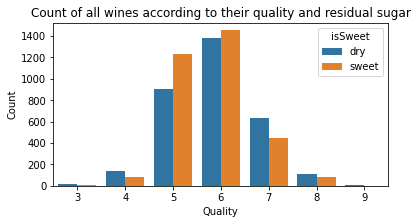

In [104]:
plt.figure(figsize = (6, 3))
sns.countplot(x ='quality', hue = "isSweet", data = wines_dataset, hue_order = ['dry', 'sweet'])
plt.title("Count of all wines according to their quality and residual sugar")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.legend(title = "isSweet")
plt.show()
plt.close()

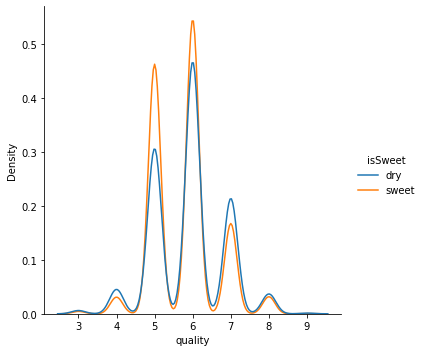

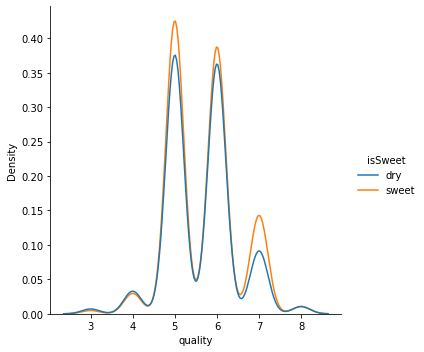

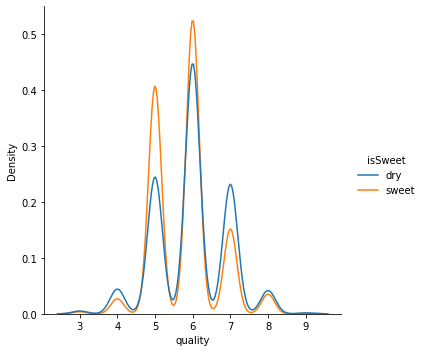

In [105]:
sns.displot(wines_dataset, x="quality", hue="isSweet", kind="kde")
sns.displot(red_dataset2, x="quality", hue="isSweet", kind="kde")
sns.displot(white_dataset2, x="quality", hue="isSweet", hue_order = ['dry', 'sweet'], kind="kde")

#### 2.   **Comparison "quality" against "alcohol_cat"**.

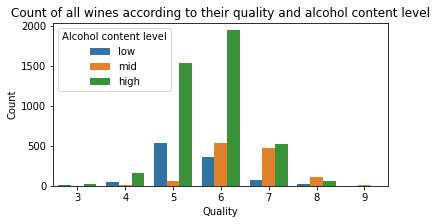

In [106]:
plt.figure(figsize = (6, 3))
sns.countplot(x ='quality', hue = "alcohol_cat", data = wines_dataset, hue_order = ['low', 'mid', 'high'])
plt.title("Count of all wines according to their quality and alcohol content level")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.legend(title = "Alcohol content level")
plt.show()
plt.close()

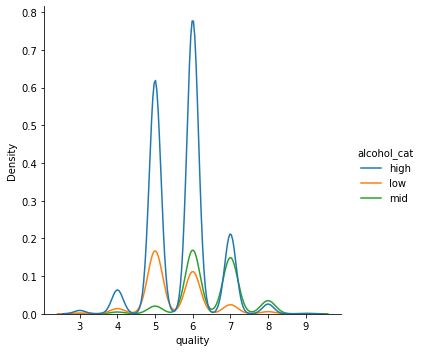

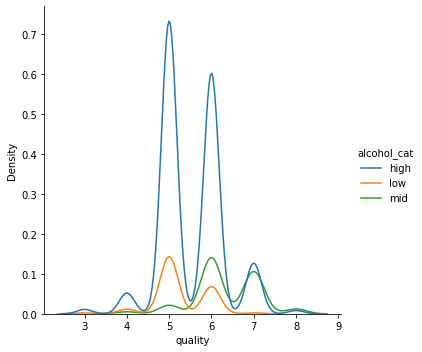

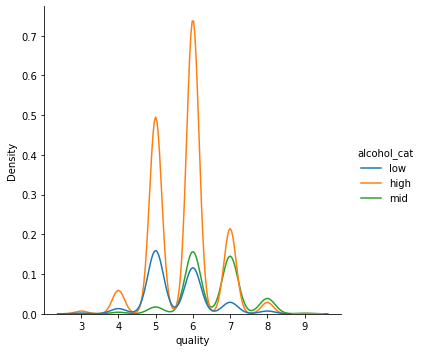

In [107]:
sns.displot(wines_dataset, x="quality", hue="alcohol_cat",kind="kde")
sns.displot(red_dataset2, x="quality", hue="alcohol_cat",kind="kde")
sns.displot(white_dataset2, x="quality", hue="alcohol_cat",kind="kde")

## **Extension 2**

Correlation analysis from earlier in the project helps guide the selection of variables for model building. When two variables are highly correlated, including both in a predictive model is unnecessary; instead, separate models can be trained with each variable excluded in turn to compare their impact on performance.

Variables that show little or no correlation with the outcome, or those with very low variance, tend to have limited predictive value and can be omitted from the feature set.

For the red wine dataset, "free sulfur dioxide" and "total sulfur dioxide" are strongly correlated (correlation coefficient of 0.79). To assess their individual contribution, models are trained with each variable removed and their classification results compared.

In the white wine dataset, "residual sugar" and "density" also show high correlation (correlation coefficient of 0.78). Similarly, models are trained with each variable excluded to evaluate which is more informative for predicting wine quality.

This process refines the feature set, reduces redundancy, and helps improve both interpretability and predictive performance of the models.

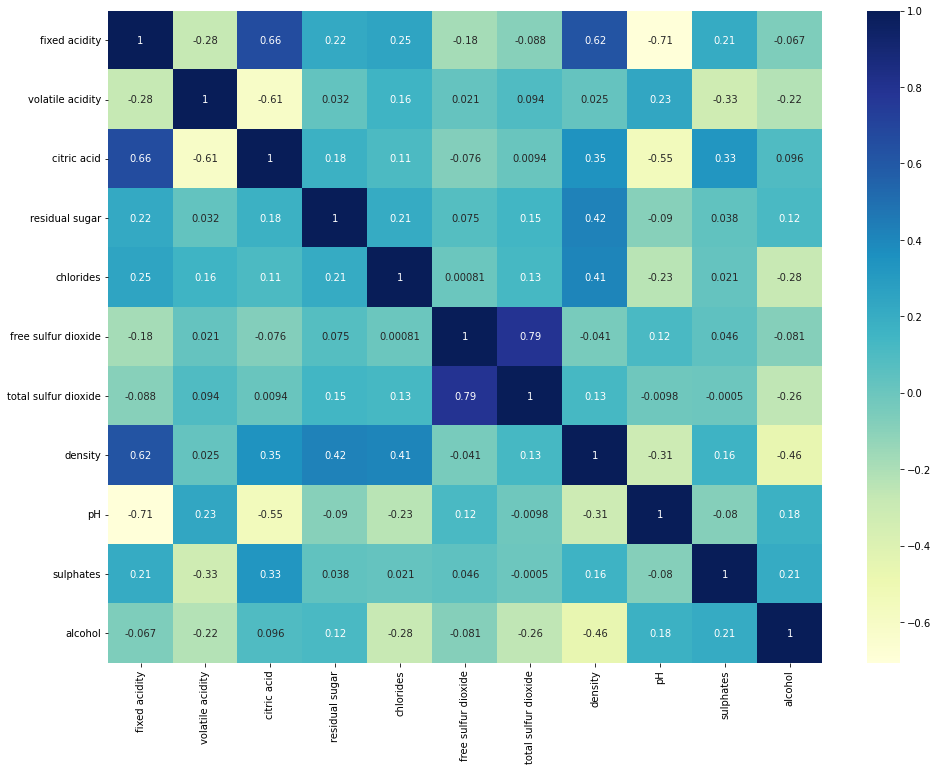

In [108]:
plt.figure(figsize=(16, 12))

sns.heatmap(red_dataset_corr2, annot=True, cmap="YlGnBu")

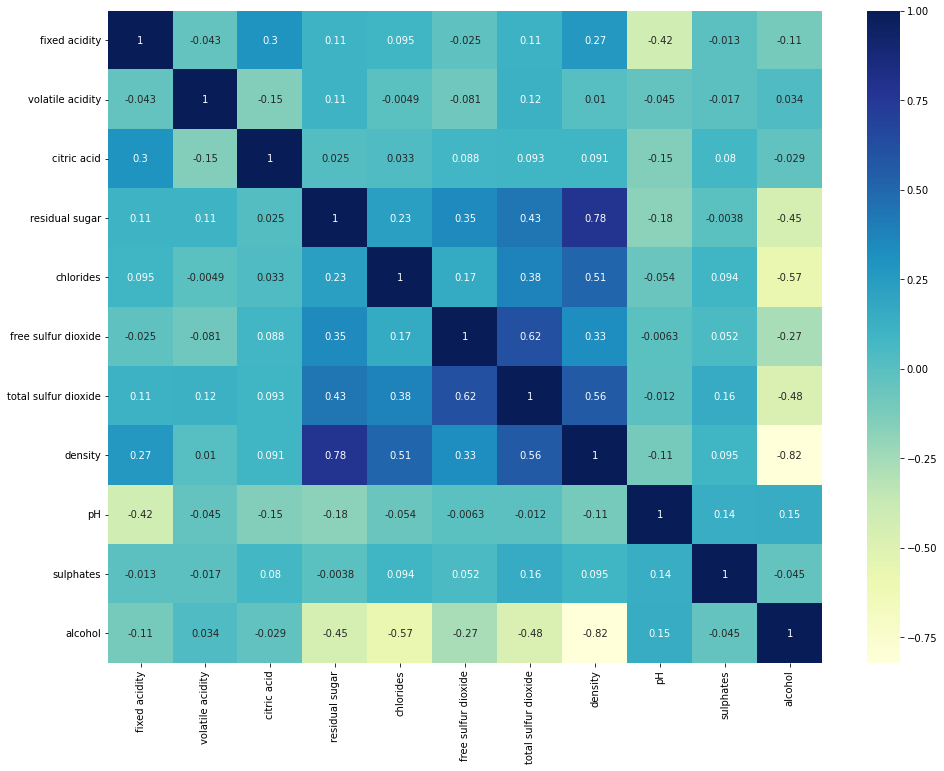

In [109]:
plt.figure(figsize=(16, 12))

sns.heatmap(white_dataset_corr2, annot=True, cmap="YlGnBu")

**Conclusions RED dataset:**

*   The variables "***free sulfur dioxide"*** and "***total sulfur dioxide"*** are highly correlated with each other, with a value of 0.79.

1) Train 2 different machine learning models as a binary classication:

*   Column "*free sulfur dioxide"* removed.
*   Column "*total sulfur dioxide"* removed.

2) Comparing their performance, which variable is most effective?

**Conclusions WHITE dataset:**

*   The variables "***residual sugar"*** and "***density"*** are highly correlated with each other, with a value of 0.79.

1) Train 2 different machine learning models as a binary classication:

*   Column "*residual sugar"* removed.
*   Column "*density"* removed.

2) Comparing their performance, which variable is most effective?

### 1.   Train model without "free sulfur dioxide" column



#### Logistic regression:

In [110]:
red_dataset1 = pd.read_csv(red_path, header = 0, delimiter = ";")

quality_level = []
for v in red_dataset1["quality"]:
    if v < 6:
      quality_level.append("low")
    else:
      quality_level.append("high")
red_dataset1["quality_level"] = quality_level


red_dataset1 = red_dataset1.drop(['quality'], axis=1)

red_dataset1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality_level  
0      9.4           low  
1      9.8           low  
2      9.8           low  
3      9.8          high  
4      9.4           low

In [111]:
red_dataset1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_level'],
      dtype='object')

In [112]:
data_red = red_dataset1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

labels_red = red_dataset1['quality_level']

data_red_train, data_red_test, labels_red_train, labels_red_test = train_test_split(data_red,labels_red,test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(data_red_train)

data_red_train_scaled = scaler.transform(data_red_train)
data_red_test_scaled = scaler.transform(data_red_test)

lrm_red = LogisticRegression()
lrm_red.fit(data_red_train_scaled, labels_red_train)
lrm_red_label_predictions = lrm_red.predict(data_red_test_scaled)

print(classification_report(labels_red_test, lrm_red_label_predictions))

              precision    recall  f1-score   support

        high       0.78      0.72      0.75       267
         low       0.68      0.74      0.71       213

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.74      0.73      0.73       480



#### SVM

SVM with hyperparameter tuning:

In [113]:
from sklearn.model_selection import GridSearchCV

number_of_folds = 5
random_state = 10

parameters_to_tune = [{'kernel': ['poly', 'rbf'],
                      'C': [1, 10],
                      'coef0': [1, 9]}]

search = GridSearchCV(SVC(random_state = random_state), parameters_to_tune, cv = number_of_folds)
search.fit(data_red_train_scaled, labels_red_train)

svm_red = SVC(kernel = search.best_params_['kernel'],
                     C = search.best_params_['C'],
                     coef0 = search.best_params_['coef0'], random_state = 10)
svm_red.fit(data_red_train_scaled, labels_red_train)

svm_red_predictions = svm_red.predict(data_red_train_scaled)
train_acc = accuracy_score(labels_red_train, svm_red_predictions)

svm_red_predictions = svm_red.predict(data_red_test_scaled)
test_acc = accuracy_score(labels_red_test, svm_red_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

print(classification_report(labels_red_test,svm_red_predictions))

Train acc: 79.80339588918677%
Test acc: 75.0%
              precision    recall  f1-score   support

        high       0.80      0.74      0.77       267
         low       0.70      0.76      0.73       213

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



SVM without hyperparameter tuning:

In [114]:
C = 100
kernel = 'poly'
random_state = 10
degree = 10
coef0 = 9

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

svm_red = SVC(kernel = kernel, degree = degree, C = C, coef0 = coef0, random_state = 10)
svm_red.fit(data_red_train_scaled, labels_red_train)

svm_red_predictions = svm_red.predict(data_red_train_scaled)
train_acc = accuracy_score(labels_red_train, svm_red_predictions)

svm_red_predictions = svm_red.predict(data_red_test_scaled)
test_acc = accuracy_score(labels_red_test, svm_red_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

print(classification_report(labels_red_test,svm_red_predictions))

Train acc: 100.0%
Test acc: 71.04166666666667%
              precision    recall  f1-score   support

        high       0.74      0.74      0.74       267
         low       0.67      0.67      0.67       213

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480



### 2. Train model without "total sulfur dioxide" column

#### Logistic Regresssion

In [115]:
data_red2 = red_dataset1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

labels_red2 = red_dataset1['quality_level']

data_red_train2, data_red_test2, labels_red_train2, labels_red_test2 = train_test_split(data_red2,labels_red2,test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(data_red_train2)

data_red_train_scaled2 = scaler.transform(data_red_train2)
data_red_test_scaled2 = scaler.transform(data_red_test2)

lrm_red2 = LogisticRegression()
lrm_red2.fit(data_red_train_scaled2, labels_red_train2)
lrm_red_label_predictions2 = lrm_red.predict(data_red_test_scaled2)

print(classification_report(labels_red_test2, lrm_red_label_predictions2))

test_acc = accuracy_score(labels_red_test2, lrm_red_label_predictions2)
print(f"Test acc: {test_acc * 100}%")

              precision    recall  f1-score   support

        high       0.77      0.72      0.74       267
         low       0.67      0.73      0.70       213

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480

Test acc: 72.08333333333333%


#### SVM

SVM with hyperparameter tuning:

In [116]:
from sklearn.model_selection import GridSearchCV

number_of_folds = 5
random_state = 10

parameters_to_tune = [{'kernel': ['poly', 'rbf'],
                      'C': [1, 10],
                      'coef0': [1, 9]}]

search = GridSearchCV(SVC(random_state = random_state), parameters_to_tune, cv = number_of_folds)
search.fit(data_red_train_scaled2, labels_red_train2)

svm_red2 = SVC(kernel = search.best_params_['kernel'],
                     C = search.best_params_['C'],
                     coef0 = search.best_params_['coef0'], random_state = 10)
svm_red2.fit(data_red_train_scaled2, labels_red_train2)

svm_red_predictions2 = svm_red2.predict(data_red_train_scaled2)
train_acc2 = accuracy_score(labels_red_train2, svm_red_predictions2)

svm_red_predictions2 = svm_red2.predict(data_red_test_scaled2)
test_acc2 = accuracy_score(labels_red_test2, svm_red_predictions2)

print(f"Train acc: {train_acc2 * 100}%")
print(f"Test acc: {test_acc2 * 100}%")

print(classification_report(labels_red_test2,svm_red_predictions2))

Train acc: 84.71849865951742%
Test acc: 75.41666666666667%
              precision    recall  f1-score   support

        high       0.78      0.77      0.78       267
         low       0.72      0.73      0.73       213

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



SVM without hyperparameter tuning:

In [117]:
C = 100
kernel = 'poly'
random_state = 10
degree = 10
coef0 = 9

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

svm_red2 = SVC(kernel = kernel, degree = degree, C = C, coef0 = coef0, random_state = 10)
svm_red2.fit(data_red_train_scaled2, labels_red_train2)

svm_red_predictions2 = svm_red2.predict(data_red_train_scaled2)
train_acc2 = accuracy_score(labels_red_train2, svm_red_predictions2)

svm_red_predictions2 = svm_red2.predict(data_red_test_scaled2)
test_acc2 = accuracy_score(labels_red_test2, svm_red_predictions2)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

print(classification_report(labels_red_test2,svm_red_predictions2))

Train acc: 100.0%
Test acc: 72.08333333333333%
              precision    recall  f1-score   support

        high       0.75      0.75      0.75       267
         low       0.69      0.69      0.69       213

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



### 1.   Train model without "alcohol" column

#### Logistic Regresssion

In [118]:
white_dataset1 = pd.read_csv(white_path, header = 0, delimiter = ";")

quality_level = []
for v in white_dataset1["quality"]:
    if v < 6:
      quality_level.append("low")
    else:
      quality_level.append("high")
white_dataset1["quality_level"] = quality_level


white_dataset1 = white_dataset1.drop(['quality'], axis=1)

white_dataset1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol quality_level  
0      8.8          high  
1      9.5          high  
2     10.1          high  
3      9.9          high  
4      9.9          high

In [119]:
data_white = white_dataset1[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates']]

labels_white = white_dataset1['quality_level']

data_white_train, data_white_test, labels_white_train, labels_white_test = train_test_split(data_white,labels_white,test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(data_white_train)

data_white_train_scaled = scaler.transform(data_white_train)
data_white_test_scaled = scaler.transform(data_white_test)

lrm_white = LogisticRegression()
lrm_white.fit(data_white_train_scaled, labels_white_train)
lrm_white_label_predictions = lrm_white.predict(data_white_test_scaled)

print(classification_report(labels_white_test, lrm_white_label_predictions))

              precision    recall  f1-score   support

        high       0.78      0.87      0.82       997
         low       0.64      0.50      0.56       473

    accuracy                           0.75      1470
   macro avg       0.71      0.68      0.69      1470
weighted avg       0.74      0.75      0.74      1470



#### SVM

SVM with hyperparameter tuning:

In [120]:
from sklearn.model_selection import GridSearchCV

number_of_folds = 5
random_state = 10

parameters_to_tune = [{'kernel': ['rbf'],
                      'C': [1, 10],
                      'coef0': [1, 9]}]

search_white = GridSearchCV(SVC(random_state = random_state), parameters_to_tune, cv = number_of_folds)
search_white.fit(data_white_train_scaled, labels_white_train)

svm_white = SVC(kernel = search.best_params_['kernel'],
                     C = search.best_params_['C'],
                     coef0 = search.best_params_['coef0'], random_state = 10)
svm_white.fit(data_white_train_scaled, labels_white_train)

svm_white_predictions = svm_white.predict(data_white_train_scaled)
train_acc = accuracy_score(labels_white_train, svm_white_predictions)

svm_white_predictions = svm_white.predict(data_white_test_scaled)
test_acc = accuracy_score(labels_white_test, svm_white_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

print(classification_report(labels_white_test,svm_white_predictions))

Train acc: 81.62193698949824%
Test acc: 77.89115646258503%
              precision    recall  f1-score   support

        high       0.82      0.86      0.84       997
         low       0.67      0.61      0.64       473

    accuracy                           0.78      1470
   macro avg       0.75      0.74      0.74      1470
weighted avg       0.77      0.78      0.78      1470



SVM without hyperparameter tuning:

In [121]:
C = 100
kernel = 'poly'
random_state = 10
degree = 10
coef0 = 9

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

svm_white = SVC(kernel = kernel, random_state = 10)

svm_white.fit(data_white_train_scaled, labels_white_train)

svm_white_predictions = svm_white.predict(data_white_train_scaled)
train_acc = accuracy_score(labels_white_train, svm_white_predictions)

svm_white_predictions = svm_white.predict(data_white_test_scaled)
test_acc = accuracy_score(labels_white_test, svm_white_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

print(classification_report(labels_white_test,svm_white_predictions))

Train acc: 74.53325554259042%
Test acc: 74.6938775510204%
              precision    recall  f1-score   support

        high       0.75      0.95      0.84       997
         low       0.76      0.32      0.44       473

    accuracy                           0.75      1470
   macro avg       0.75      0.63      0.64      1470
weighted avg       0.75      0.75      0.71      1470



### 2. Train model without "density" column

#### Logistic Regresssion

In [122]:
data_white2 = white_dataset1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide','total sulfur dioxide', 
       'pH', 'sulphates', 'alcohol']]

labels_white2 = white_dataset1['quality_level']

data_white_train2, data_white_test2, labels_white_train2, labels_white_test2 = train_test_split(data_white2,labels_white2,test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(data_white_train2)

data_white_train_scaled2 = scaler.transform(data_white_train2)
data_white_test_scaled2 = scaler.transform(data_white_test2)

lrm_white2 = LogisticRegression()
lrm_white2.fit(data_white_train_scaled2, labels_white_train2)
lrm_white_label_predictions2 = lrm_white2.predict(data_white_test_scaled2)

print(classification_report(labels_white_test2, lrm_white_label_predictions2))

test_acc = accuracy_score(labels_white_test2, lrm_white_label_predictions2)
print(f"Test acc: {test_acc * 100}%")

              precision    recall  f1-score   support

        high       0.79      0.86      0.82       997
         low       0.64      0.52      0.57       473

    accuracy                           0.75      1470
   macro avg       0.72      0.69      0.70      1470
weighted avg       0.74      0.75      0.74      1470

Test acc: 75.17006802721087%


#### SVM

SVM with hyperparameter tuning:

In [123]:
from sklearn.model_selection import GridSearchCV

number_of_folds = 5
random_state = 10

parameters_to_tune = [{'kernel': ['rbf'],
                      'C': [1, 10],
                      'coef0': [1, 9]}]

search = GridSearchCV(SVC(random_state = random_state), parameters_to_tune, cv = number_of_folds)
search.fit(data_white_train_scaled2, labels_white_train2)

svm_white2 = SVC(kernel = search.best_params_['kernel'],
                     C = search.best_params_['C'],
                     coef0 = search.best_params_['coef0'], random_state = 10)
svm_white2.fit(data_white_train_scaled2, labels_white_train2)

svm_white_predictions2 = svm_white2.predict(data_white_train_scaled2)
train_acc2 = accuracy_score(labels_white_train2, svm_white_predictions2)

svm_white_predictions2 = svm_white2.predict(data_white_test_scaled2)
test_acc2 = accuracy_score(labels_white_test2, svm_white_predictions2)

print(f"Train acc: {train_acc2 * 100}%")
print(f"Test acc: {test_acc2 * 100}%")

print(classification_report(labels_white_test2,svm_white_predictions2))

Train acc: 86.55192532088681%
Test acc: 79.04761904761905%
              precision    recall  f1-score   support

        high       0.84      0.86      0.85       997
         low       0.69      0.64      0.66       473

    accuracy                           0.79      1470
   macro avg       0.76      0.75      0.76      1470
weighted avg       0.79      0.79      0.79      1470



SVM without hyperparameter tuning:

In [124]:
C = 100
kernel = 'poly'
random_state = 10
degree = 10
coef0 = 9

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

svm_white2 = SVC(kernel = kernel, random_state = 10)

svm_white2.fit(data_white_train_scaled2, labels_white_train2)

svm_white_predictions2 = svm_white2.predict(data_white_train_scaled2)
train_acc2 = accuracy_score(labels_white_train2, svm_white_predictions2)

svm_white_predictions2 = svm_white2.predict(data_white_test_scaled2)
test_acc2 = accuracy_score(labels_white_test2, svm_white_predictions2)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

print(classification_report(labels_white_test2,svm_white_predictions2))

Train acc: 74.53325554259042%
Test acc: 75.17006802721087%
              precision    recall  f1-score   support

        high       0.76      0.94      0.84       997
         low       0.74      0.37      0.49       473

    accuracy                           0.75      1470
   macro avg       0.75      0.65      0.67      1470
weighted avg       0.75      0.75      0.73      1470



## **Extension 3**

### **Additional Learning**

Predicting all possible quality labels as opposed to just the two labels "low" and "high"?



In [125]:
red_dataset3 = pd.read_csv(red_path, header = 0, delimiter = ";")

red_dataset3.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [126]:
white_dataset3 = pd.read_csv(white_path, header = 0, delimiter = ";")
white_dataset3.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

#### 1.   Train model without "free sulfur dioxide" column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


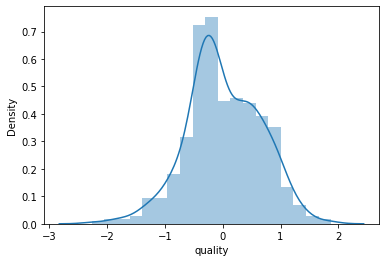

In [127]:
data_red3 = red_dataset3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

labels_red3 = red_dataset3['quality']

data_red_train3, data_red_test3, labels_red_train3, labels_red_test3 = train_test_split(data_red3,labels_red3,test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(data_red_train3)

data_red_train_scaled3 = scaler.transform(data_red_train3)
data_red_test_scaled3 = scaler.transform(data_red_test3)

lm_red = LinearRegression()
lm_red.fit(data_red_train_scaled3, labels_red_train3)
lm_red_label_predictions = lm_red.predict(data_red_test_scaled3)

sns.distplot(labels_red_test3 - lm_red_label_predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


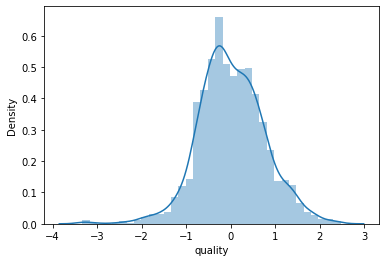

In [128]:
data_white3 = white_dataset3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
      'chlorides', 'total sulfur dioxide', 'density',
      'pH', 'sulphates', 'alcohol']]
 
labels_white3 = white_dataset3['quality']
 
data_white_train3, data_white_test3, labels_white_train3, labels_white_test3 = train_test_split(data_white3,labels_white3,test_size=0.3, random_state=42)
 
scaler = StandardScaler()
scaler.fit(data_white_train3)
 
data_white_train_scaled3 = scaler.transform(data_white_train3)
data_white_test_scaled3 = scaler.transform(data_white_test3)
 
lm_white = LinearRegression()
lm_white.fit(data_white_train_scaled3, labels_white_train3)
lm_white_label_predictions = lm_white.predict(data_white_test_scaled3)
 
sns.distplot(labels_white_test3 - lm_white_label_predictions)


#### 2.   Train model without "total sulfur dioxide" column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


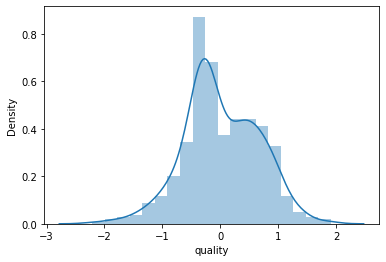

In [129]:
data_red3 = red_dataset3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

labels_red3 = red_dataset3['quality']

data_red_train3, data_red_test3, labels_red_train3, labels_red_test3 = train_test_split(data_red3,labels_red3,test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(data_red_train3)

data_red_train_scaled3 = scaler.transform(data_red_train3)
data_red_test_scaled3 = scaler.transform(data_red_test3)

lm_red = LinearRegression()
lm_red.fit(data_red_train_scaled3, labels_red_train3)
lm_red_label_predictions = lm_red.predict(data_red_test_scaled3)

sns.distplot(labels_red_test3 - lm_red_label_predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


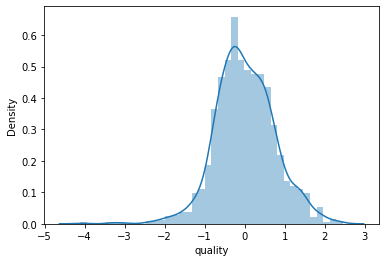

In [130]:
data_white3 = white_dataset3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
      'chlorides', 'free sulfur dioxide', 'density',
      'pH', 'sulphates', 'alcohol']]
 
labels_white3 = white_dataset3['quality']
 
data_white_train3, data_white_test3, labels_white_train3, labels_white_test3 = train_test_split(data_white3,labels_white3,test_size=0.3, random_state=42)
 
scaler = StandardScaler()
scaler.fit(data_white_train3)
 
data_white_train_scaled3 = scaler.transform(data_white_train3)
data_white_test_scaled3 = scaler.transform(data_white_test3)
 
lm_white = LinearRegression()
lm_white.fit(data_white_train_scaled3, labels_white_train3)
lm_white_label_predictions = lm_white.predict(data_white_test_scaled3)
 
sns.distplot(labels_white_test3 - lm_white_label_predictions)


#### ***Conclusions***



*   If the "total sufur dioxide" column is removed from both dataset, models seem to perform better.
*   Look for normal distributions when plotting the bar chart bar in order to see how well the model predicts.

